In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.losses import binary_crossentropy
from tensorflow.python.keras import optimizers
from tensorflow.python.keras import initializers
import matplotlib.pyplot as plt
from tensorflow.python.keras.callbacks import ModelCheckpoint
import os
from tensorflow.python import keras
import tempfile
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
import sys
import math 
import random as rd
from sklearn.model_selection import KFold
import statistics
from math import sqrt

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [11]:
bkgfiles_2016=[#'/scratch/wjin/featurereduced4/bkg/preselection_2016_qcd_skim.npy',
'/scratch/wjin/featurereduced4/bkg/preselection_2016_singletop_skim.npy',
'/scratch/wjin/featurereduced4/bkg/preselection_2016_tt_skim.npy',
'/scratch/wjin/featurereduced4/bkg/preselection_2016_wjets_skim.npy',
'/scratch/wjin/featurereduced4/bkg/preselection_2016_zinv_skim.npy']

bkgfiles_2017=[#'/scratch/wjin/featurereduced3/bkg/preselection_2017_dyjetsll_slim.npy',
#'/scratch/wjin/featurereduced3/bkg/preselection_2017_gjets_slim.npy',
#'/work/wjin/featurereduced4/bkg/preselection_2017_qcd_skim.npy',
'/scratch/wjin/featurereduced4/bkg/preselection_2017_singletop_skim.npy',
'/scratch/wjin/featurereduced4/bkg/preselection_2017_tt_skim.npy',
#'/scratch/wjin/featurereduced3/bkg/preselection_2017_tt_negligible_slim.npy',
'/scratch/wjin/featurereduced4/bkg/preselection_2017_wjets_skim.npy',
#'/scratch/wjin/featurereduced3/bkg/preselection_2017_ww_wz_slim.npy',
'/scratch/wjin/featurereduced4/bkg/preselection_2017_zinv_skim.npy']

bkgfiles_2018=[#'/scratch/wjin/featurereduced3/bkg/preselection_2018_dyjetsll_slim.npy',
#'/scratch/wjin/featurereduced3/bkg/preselection_2018_gjets_slim.npy',
#'/work/wjin/featurereduced4/bkg/preselection_2018_qcd_skim.npy',
'/scratch/wjin/featurereduced4/bkg/preselection_2018_singletop_skim.npy',
'/scratch/wjin/featurereduced4/bkg/preselection_2018_tt_skim.npy',
#'/scratch/wjin/featurereduced3/bkg/preselection_2018_tt_negligible_slim.npy',
'/scratch/wjin/featurereduced4/bkg/preselection_2018_wjets_skim.npy',
#'/scratch/wjin/featurereduced3/bkg/preselection_2018_ww_wz_slim.npy',
'/scratch/wjin/featurereduced4/bkg/preselection_2018_zinv_skim.npy']

sigfiles_T1bbbb_2016=['/scratch/wjin/featurereduced4/sig/preselection_2016_T1bbbb_94x_1_skim.npy',
                     '/scratch/wjin/featurereduced4/sig/preselection_2016_T1bbbb_94x_2_skim.npy',
                     '/scratch/wjin/featurereduced4/sig/preselection_2016_T1bbbb_94x_skim.npy']

sigfiles_T1bbbb_2017=['/scratch/wjin/featurereduced4/sig/preselection_2017_T1bbbb_1_skim.npy',
                     '/scratch/wjin/featurereduced4/sig/preselection_2017_T1bbbb_2_skim.npy',
                     '/scratch/wjin/featurereduced4/sig/preselection_2017_T1bbbb_ext1_1_skim.npy',
                     '/scratch/wjin/featurereduced4/sig/preselection_2017_T1bbbb_ext1_2_skim.npy',
                     '/scratch/wjin/featurereduced4/sig/preselection_2017_T1bbbb_ext1_3_skim.npy',
                     '/scratch/wjin/featurereduced4/sig/preselection_2017_T1bbbb_ext1_4_skim.npy',
                     '/scratch/wjin/featurereduced4/sig/preselection_2017_T1bbbb_ext1_skim.npy',
                     '/scratch/wjin/featurereduced4/sig/preselection_2017_T1bbbb_skim.npy']

#binning nJet30 nBJet20 ht
htbin=[[250,450],[450,575],[575,1200],[1200,1500],[1500,np.Inf],[250,350],[350,450],[575,700],[700,1000],[1000,1200],[1200,np.Inf],[700,np.Inf]]
nJet30bin=[[2,4],[4,7],[7,10],[10,16],[1,2]]
nBJet20bin=[[0,1],[1,2],[2,3],[3,4],[4,16]]
selections=[]
for htrange in range(5):
    selections.append([htbin[htrange],nJet30bin[0],nBJet20bin[0]])
    selections.append([htbin[htrange],nJet30bin[0],nBJet20bin[1]])
    selections.append([htbin[htrange],nJet30bin[0],nBJet20bin[2]])
    selections.append([htbin[htrange],nJet30bin[1],nBJet20bin[0]])
    selections.append([htbin[htrange],nJet30bin[1],nBJet20bin[1]])
    selections.append([htbin[htrange],nJet30bin[1],nBJet20bin[2]])
    selections.append([htbin[htrange],[nJet30bin[0][0],nJet30bin[1][1]],[nBJet20bin[3][0],16]])
for htrange in [0,1]:
    selections.append([htbin[htrange],[nJet30bin[2][0],16],nBJet20bin[0]])
    selections.append([htbin[htrange],[nJet30bin[2][0],16],nBJet20bin[1]])
    selections.append([htbin[htrange],[nJet30bin[2][0],16],nBJet20bin[2]])
    selections.append([htbin[htrange],[nJet30bin[2][0],16],[nBJet20bin[3][0],16]])
for htrange in [2,3,4]:
    selections.append([htbin[htrange],nJet30bin[2],nBJet20bin[0]])
    selections.append([htbin[htrange],nJet30bin[2],nBJet20bin[1]])
    selections.append([htbin[htrange],nJet30bin[2],nBJet20bin[2]])
    selections.append([htbin[htrange],nJet30bin[2],nBJet20bin[3]])
    selections.append([htbin[htrange],nJet30bin[2],nBJet20bin[4]])
    selections.append([htbin[htrange],nJet30bin[3],nBJet20bin[0]])
    selections.append([htbin[htrange],nJet30bin[3],nBJet20bin[1]])
    selections.append([htbin[htrange],nJet30bin[3],nBJet20bin[2]])
    selections.append([htbin[htrange],nJet30bin[3],nBJet20bin[3]])
    selections.append([htbin[htrange],nJet30bin[3],nBJet20bin[4]])
selections.append([htbin[5],nJet30bin[4],nBJet20bin[0]])
selections.append([htbin[6],nJet30bin[4],nBJet20bin[0]])
selections.append([htbin[1],nJet30bin[4],nBJet20bin[0]])
selections.append([htbin[7],nJet30bin[4],nBJet20bin[0]])
selections.append([htbin[8],nJet30bin[4],nBJet20bin[0]])
selections.append([htbin[9],nJet30bin[4],nBJet20bin[0]])
selections.append([htbin[10],nJet30bin[4],nBJet20bin[0]])
selections.append([htbin[5],nJet30bin[4],nBJet20bin[1]])
selections.append([htbin[6],nJet30bin[4],nBJet20bin[1]])
selections.append([htbin[1],nJet30bin[4],nBJet20bin[1]])
selections.append([htbin[7],nJet30bin[4],nBJet20bin[1]])
selections.append([htbin[11],nJet30bin[4],nBJet20bin[1]])
massskim=1
mass1con=1500
mass2con=800

In [12]:
def significance(data,m1,m2,sigfra,bkgfra,cut=0.5,weight=b'absweight',sigtag=b'sigtag',score=b'MLscore'):
    b=np.sum(data[(data[sigtag]==0)&(data[score]>cut)][weight])/bkgfra
    if b==0:
        return -1
    s=np.sum(data[(data[sigtag]==1)&(data[b'GenSusyMScan1']==m1)
            &(data[b'GenSusyMScan2']==m2)&(data[score]>cut)][weight])/sigfra
    q0=2*((s+b)*np.log(1+s/b)-s)
    return np.sqrt(q0)

In [13]:
features_exclude=[b'nJet30',b'nJet40',b'nBJet20',b'nBJet30',b'nBJet40',b'ht',b'mt2',b'mht_pt',b'met_pt',b'mht_phi',b'met_phi',b'njet']
#features_train=[b'deltaPhiMin',b'diffMetMht',
 #         b'jet1_eta',b'jet1_phi',b'jet1_btagDeepCSV',b'jet2_eta',b'jet2_phi',b'jet2_btagDeepCSV',b'jet3_eta',b'jet3_phi',b'jet3_btagDeepCSV',
  #        b'jet4_eta',b'jet4_phi',b'jet4_btagDeepCSV',b'jet5_eta',b'jet5_phi',b'jet5_btagDeepCSV',b'jet6_eta',b'jet6_phi',b'jet6_btagDeepCSV',
   #       b'jet7_eta',b'jet7_phi',b'jet7_btagDeepCSV',b'jet8_eta',b'jet8_phi',b'jet8_btagDeepCSV',b'jet9_eta',b'jet9_phi',b'jet9_btagDeepCSV',
    #      b'jet10_eta',b'jet10_phi',b'jet10_btagDeepCSV',b'jet11_eta',b'jet11_phi',b'jet11_btagDeepCSV',b'jet12_eta',b'jet12_phi',b'jet12_btagDeepCSV',
      #    b'jet13_eta',b'jet13_phi',b'jet13_btagDeepCSV',b'jet14_eta',b'jet14_phi',b'jet14_btagDeepCSV',b'jet15_eta',b'jet15_phi',b'jet15_btagDeepCSV',
       #   b'jet1_pt',b'jet2_pt',b'jet3_pt',b'jet4_pt',b'jet5_pt',
        #  b'jet6_pt',b'jet7_pt',b'jet8_pt',b'jet9_pt',b'jet10_pt',
         # b'jet11_pt',b'jet12_pt',b'jet13_pt',b'jet14_pt',b'jet15_pt']

def feature_choice(njet):
    features_pre=[[b'jet1_eta',b'jet1_phi',b'jet1_pt',b'jet1_btagDeepCSV'],
             [b'jet2_eta',b'jet2_phi',b'jet2_pt',b'jet2_btagDeepCSV'],
             [b'jet3_eta',b'jet3_phi',b'jet3_pt',b'jet3_btagDeepCSV'],
             [b'jet4_eta',b'jet4_phi',b'jet4_pt',b'jet4_btagDeepCSV'],
             [b'jet5_eta',b'jet5_phi',b'jet5_pt',b'jet5_btagDeepCSV'],
             [b'jet6_eta',b'jet6_phi',b'jet6_pt',b'jet6_btagDeepCSV'],
             [b'jet7_eta',b'jet7_phi',b'jet7_pt',b'jet7_btagDeepCSV'],
             [b'jet8_eta',b'jet8_phi',b'jet8_pt',b'jet8_btagDeepCSV'],
             [b'jet9_eta',b'jet9_phi',b'jet9_pt',b'jet9_btagDeepCSV'],
             [b'jet10_eta',b'jet10_phi',b'jet10_pt',b'jet0_btagDeepCSV'],
             [b'jet11_eta',b'jet11_phi',b'jet11_pt',b'jet11_btagDeepCSV'],
             [b'jet12_eta',b'jet12_phi',b'jet12_pt',b'jet12_btagDeepCSV'],
             [b'jet13_eta',b'jet13_phi',b'jet13_pt',b'jet13_btagDeepCSV'],
             [b'jet14_eta',b'jet14_phi',b'jet14_pt',b'jet14_btagDeepCSV'],
             [b'jet15_eta',b'jet15_phi',b'jet15_pt',b'jet15_btagDeepCSV']]
    features_train=[b'deltaPhiMin',b'diffMetMht',b'mht_pt',b'met_pt',b'mht_phi',b'met_phi']
    for i in range(njet):
        features_train=features_train+features_pre[i]
    return features_train
    

In [14]:
def plot_history(histories, key_loss='loss'):
    fig=plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(111)
    for name, history in histories:
        val_loss = ax1.plot(history.epoch, history.history['val_'+key_loss],
                   '--', label=name.title()+' Val - '+key_loss)
        ax1.plot(history.epoch, history.history[key_loss], color=val_loss[0].get_color(),
             label=name.title()+' Train - '+key_loss)
    ax1.set_xlabel('Epochs',fontsize=18)
    ax1.set_ylabel(key_loss+' funtion',fontsize=18)
    ax1.legend(loc='best',prop={'size': 12})
    ax1.set_title('classification learning curve - '+key_loss+' funcion',fontsize=20)
    ax1.set_xlim([0,max(history.epoch)])
    return fig

In [15]:
databkg_2016=[]
for i in range(4):
    databkg_2016.append(pd.DataFrame(np.load(bkgfiles_2016[i],allow_pickle=True).item()))
    databkg_2016[i][b'bkgtype']=i
databkg_2016=pd.concat(databkg_2016,axis=0)

datasig_T1bbbb_2016=pd.concat([pd.DataFrame(np.load(i,allow_pickle=True).item()) for i in sigfiles_T1bbbb_2016],axis=0)
if massskim:
    datasig_T1bbbb_2016=datasig_T1bbbb_2016[(datasig_T1bbbb_2016[b'GenSusyMScan1']>=mass1con)|(datasig_T1bbbb_2016[b'GenSusyMScan2']>=mass2con)]
datasig_T1bbbb_2016[b'bkgtype']=-1

databkg_2016 = databkg_2016.replace(np.nan, 0)
datasig_T1bbbb_2016= datasig_T1bbbb_2016.replace(np.nan,0)

databkg_2016[b'evt_scale1fb'] = databkg_2016[b'evt_scale1fb'].abs()
databkg_2016[b'absweight'] = databkg_2016[b'absweight'].abs()
datasig_T1bbbb_2016[b'absweight'] = datasig_T1bbbb_2016[b'absweight'].abs()

pd.options.mode.chained_assignment = None
databkg_2016[b'sigtag']=0
datasig_T1bbbb_2016[b'sigtag']=1

In [16]:
databkg_2017=[]
for i in range(4):
    databkg_2017.append(pd.DataFrame(np.load(bkgfiles_2017[i],allow_pickle=True).item()))
    databkg_2017[i][b'bkgtype']=i
databkg_2017=pd.concat(databkg_2017,axis=0)

datasig_T1bbbb_2017=pd.concat([pd.DataFrame(np.load(i,allow_pickle=True).item()) for i in sigfiles_T1bbbb_2017],axis=0)
if massskim:
    datasig_T1bbbb_2017=datasig_T1bbbb_2017[(datasig_T1bbbb_2017[b'GenSusyMScan1']>=mass1con)|(datasig_T1bbbb_2017[b'GenSusyMScan2']>=mass2con)]
datasig_T1bbbb_2017[b'bkgtype']=-1

databkg_2017 = databkg_2017.replace(np.nan, 0)
datasig_T1bbbb_2017= datasig_T1bbbb_2017.replace(np.nan,0)

databkg_2017[b'evt_scale1fb'] = databkg_2017[b'evt_scale1fb'].abs()
databkg_2017[b'absweight'] = databkg_2017[b'absweight'].abs()
datasig_T1bbbb_2016[b'absweight'] = datasig_T1bbbb_2016[b'absweight'].abs()

pd.options.mode.chained_assignment = None
databkg_2017[b'sigtag']=0
datasig_T1bbbb_2017[b'sigtag']=1

In [17]:
databkg_2018=[]
for i in range(4):
    databkg_2018.append(pd.DataFrame(np.load(bkgfiles_2018[i],allow_pickle=True).item()))
    databkg_2018[i][b'bkgtype']=i
databkg_2018=pd.concat(databkg_2018,axis=0)
databkg_2018 = databkg_2018.replace(np.nan, 0)
databkg_2018[b'evt_scale1fb'] = databkg_2018[b'evt_scale1fb'].abs()
databkg_2018[b'absweight'] = databkg_2018[b'absweight'].abs()
databkg_2018[b'sigtag']=0

In [18]:
databkg_bin=[]
datasig_T1bbbb_bin=[]
for i in range(len(selections)):
    databkg_bin.append(pd.concat([databkg_2016[(databkg_2016[b'ht']>=selections[i][0][0])
                                              &(databkg_2016[b'ht']<selections[i][0][1])
                                              &(databkg_2016[b'nJet30']>=selections[i][1][0])
                                              &(databkg_2016[b'nJet30']<selections[i][1][1])
                                              &(databkg_2016[b'nBJet20']>=selections[i][2][0])
                                              &(databkg_2016[b'nBJet20']<selections[i][2][1])],
                                                  databkg_2017[(databkg_2017[b'ht']>=selections[i][0][0])
                                              &(databkg_2017[b'ht']<selections[i][0][1])
                                              &(databkg_2017[b'nJet30']>=selections[i][1][0])
                                              &(databkg_2017[b'nJet30']<selections[i][1][1])
                                              &(databkg_2017[b'nBJet20']>=selections[i][2][0])
                                              &(databkg_2017[b'nBJet20']<selections[i][2][1])],
                                                databkg_2018[(databkg_2018[b'ht']>=selections[i][0][0])
                                              &(databkg_2018[b'ht']<selections[i][0][1])
                                              &(databkg_2018[b'nJet30']>=selections[i][1][0])
                                              &(databkg_2018[b'nJet30']<selections[i][1][1])
                                              &(databkg_2018[b'nBJet20']>=selections[i][2][0])
                                              &(databkg_2018[b'nBJet20']<selections[i][2][1])]]))
    datasig_T1bbbb_bin.append(pd.concat([datasig_T1bbbb_2016[(datasig_T1bbbb_2016[b'ht']>=selections[i][0][0])
                                              &(datasig_T1bbbb_2016[b'ht']<selections[i][0][1])
                                              &(datasig_T1bbbb_2016[b'nJet30']>=selections[i][1][0])
                                              &(datasig_T1bbbb_2016[b'nJet30']<selections[i][1][1])
                                              &(datasig_T1bbbb_2016[b'nBJet20']>=selections[i][2][0])
                                              &(datasig_T1bbbb_2016[b'nBJet20']<selections[i][2][1])],
                                                datasig_T1bbbb_2017[(datasig_T1bbbb_2017[b'ht']>=selections[i][0][0])
                                              &(datasig_T1bbbb_2017[b'ht']<selections[i][0][1])
                                              &(datasig_T1bbbb_2017[b'nJet30']>=selections[i][1][0])
                                              &(datasig_T1bbbb_2017[b'nJet30']<selections[i][1][1])
                                              &(datasig_T1bbbb_2017[b'nBJet20']>=selections[i][2][0])
                                              &(datasig_T1bbbb_2017[b'nBJet20']<selections[i][2][1])]]))

In [10]:
del datasig_T1bbbb_2016
del datasig_T1bbbb_2017
del databkg_2016
del databkg_2017
del databkg_2018

In [44]:
models_forbin={'mass':[[1400,1350],[2000,1600],[2400,1400],[2400,200]],
               #'binindex':[[33,19,20,26,25,16,27,34,18,65,23,32,66,55,15,45,46,54,84],
               'binindex':[[33,19,20],      
                          [20,47,13,46,27,57,34,66],
                          [34,27,33,66,67,65],
                          [33,34,65,32,66,64,67]],
               'significance':[]
}

In [19]:
for i in range(len(selections)):
    print("bkg entries:", databkg_bin[i].shape[0],"sig entries: ", datasig_T1bbbb_bin[i].shape[0], "bin", i, selections[i])

bkg entries: 2431592 sig entries:  138543 bin 0 [[250, 450], [2, 4], [0, 1]]
bkg entries: 324377 sig entries:  146418 bin 1 [[250, 450], [2, 4], [1, 2]]
bkg entries: 58876 sig entries:  165699 bin 2 [[250, 450], [2, 4], [2, 3]]
bkg entries: 266963 sig entries:  32077 bin 3 [[250, 450], [4, 7], [0, 1]]
bkg entries: 119435 sig entries:  72242 bin 4 [[250, 450], [4, 7], [1, 2]]
bkg entries: 65689 sig entries:  142921 bin 5 [[250, 450], [4, 7], [2, 3]]
bkg entries: 12677 sig entries:  337593 bin 6 [[250, 450], [2, 7], [3, 16]]
bkg entries: 1076623 sig entries:  58403 bin 7 [[450, 575], [2, 4], [0, 1]]
bkg entries: 130557 sig entries:  68648 bin 8 [[450, 575], [2, 4], [1, 2]]
bkg entries: 18728 sig entries:  88368 bin 9 [[450, 575], [2, 4], [2, 3]]
bkg entries: 306508 sig entries:  33136 bin 10 [[450, 575], [4, 7], [0, 1]]
bkg entries: 108348 sig entries:  87188 bin 11 [[450, 575], [4, 7], [1, 2]]
bkg entries: 58551 sig entries:  199478 bin 12 [[450, 575], [4, 7], [2, 3]]
bkg entries: 10128

In [26]:
datasig_T1bbbb_ML_bin=[]
databkg_ML_bin=[]
MLuse_bkg=[]
MLuse_sig=[]
for i in range(len(selections)):
    if databkg_bin[i].shape[0]<20000:
        databkg_ML_bin.append(databkg_bin[i][databkg_bin[i][b'MLtag']<10])
        MLuse_bkg.append(0.5)
    elif databkg_bin[i].shape[0]<40000:
        databkg_ML_bin.append(databkg_bin[i][databkg_bin[i][b'MLtag']<5])
        MLuse_bkg.append(0.25)
    elif databkg_bin[i].shape[0]<80000:
        databkg_ML_bin.append(databkg_bin[i][databkg_bin[i][b'MLtag']<3])
        MLuse_bkg.append(0.15)
    else:
        databkg_ML_bin.append(databkg_bin[i][databkg_bin[i][b'MLtag']<2])
        MLuse_bkg.append(0.1)
    if datasig_T1bbbb_bin[i].shape[0]<20000:
        datasig_T1bbbb_ML_bin.append(datasig_T1bbbb_bin[i][datasig_T1bbbb_bin[i][b'MLtag']<10])
        MLuse_sig.append(0.5)
    elif datasig_T1bbbb_bin[i].shape[0]<40000:
        datasig_T1bbbb_ML_bin.append(datasig_T1bbbb_bin[i][datasig_T1bbbb_bin[i][b'MLtag']<5])
        MLuse_sig.append(0.25)
    elif datasig_T1bbbb_bin[i].shape[0]<80000:
        datasig_T1bbbb_ML_bin.append(datasig_T1bbbb_bin[i][datasig_T1bbbb_bin[i][b'MLtag']<3])
        MLuse_sig.append(0.15)
    else:
        datasig_T1bbbb_ML_bin.append(datasig_T1bbbb_bin[i][datasig_T1bbbb_bin[i][b'MLtag']<2])
        MLuse_sig.append(0.1)

In [27]:
for i in range(73):
    print("bkg entries:", databkg_ML_bin[i].shape[0],"sig entries: ", datasig_T1bbbb_ML_bin[i].shape[0], "bin", i, selections[i])

bkg entries: 242330 sig entries:  13917 bin 0 [[250, 450], [2, 4], [0, 1]]
bkg entries: 32396 sig entries:  14601 bin 1 [[250, 450], [2, 4], [1, 2]]
bkg entries: 8868 sig entries:  16548 bin 2 [[250, 450], [2, 4], [2, 3]]
bkg entries: 26993 sig entries:  8056 bin 3 [[250, 450], [4, 7], [0, 1]]
bkg entries: 11920 sig entries:  10925 bin 4 [[250, 450], [4, 7], [1, 2]]
bkg entries: 9794 sig entries:  14369 bin 5 [[250, 450], [4, 7], [2, 3]]
bkg entries: 6353 sig entries:  33821 bin 6 [[250, 450], [2, 7], [3, 16]]
bkg entries: 107600 sig entries:  8771 bin 7 [[450, 575], [2, 4], [0, 1]]
bkg entries: 12917 sig entries:  10294 bin 8 [[450, 575], [2, 4], [1, 2]]
bkg entries: 9412 sig entries:  8795 bin 9 [[450, 575], [2, 4], [2, 3]]
bkg entries: 30453 sig entries:  8155 bin 10 [[450, 575], [4, 7], [0, 1]]
bkg entries: 10913 sig entries:  8766 bin 11 [[450, 575], [4, 7], [1, 2]]
bkg entries: 8789 sig entries:  19828 bin 12 [[450, 575], [4, 7], [2, 3]]
bkg entries: 5139 sig entries:  43266 bin 

In [32]:
#data_input=pd.concat([databkg_2016_ML,datasig_T1bbbb_2016_ML],axis=0)
#data_input=data_input.reset_index(drop=True)
#del databkg_2016_ML
#del datasig_T1bbbb_2016_ML
data_input=[]
for i in range(len(selections)):
    data_input.append([databkg_ML_bin[i],datasig_T1bbbb_ML_bin[i]])
    data_input[i][0]=data_input[i][0].reset_index(drop=True)
    data_input[i][1]=data_input[i][1].reset_index(drop=True)

In [17]:
print(data_input[28][0].shape[0],data_input[28][1][(data_input[28][1][b'GenSusyMScan1']==2000)|(data_input[28][1][b'GenSusyMScan1']==1600)].shape[0])

91327 310


In [30]:
i=65
features_train=feature_choice(selections[i][1][1]-1)
data_input[i][0]=data_input[i][0].reset_index(drop=True)
data_input[i][1]=data_input[i][1].reset_index(drop=True)
X=pd.concat(data_input[i],axis=0)[(features_train+[b'evt_scale1fb',b'GenSusyMScan1',b'GenSusyMScan2',b'absweight',b'bkgtype'])[:]]
y=pd.concat(data_input[i],axis=0)[b'sigtag']
X=X.reset_index(drop=True)
y=y.reset_index(drop=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
#train,val=train_test_split(data_input[i][(features_train+[b'evt_scale1fb',b'GenSusyMScan1',b'GenSusyMScan2',b'absweight',b'bkgtype',b'sigtag'])[:]],test_size=0.1, random_state=42)
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
X_val=X_val.reset_index(drop=True)
y_val=y_val.reset_index(drop=True)
#train=train.reset_index(drop=True)
#val=val.reset_index(drop=True)
#y_train=np.array(train.pop(b'sigtag'))
#y_val=np.array(val.pop(b'sigtag'))
#X_train=train[(features_train+[b'evt_scale1fb',b'GenSusyMScan1',b'GenSusyMScan2',b'absweight',b'bkgtype'])[:]]
#X_val=val[(features_train+[b'evt_scale1fb',b'GenSusyMScan1',b'GenSusyMScan2',b'absweight',b'bkgtype'])[:]]
print (y_train[y_train==0].shape[0], y_train[y_train==1].shape[0], y_val[y_val==0].shape[0], y_val[y_val==1].shape[0])

4702 73862 512 8218


In [31]:
X0=data_input[i][0][(features_train+[b'evt_scale1fb',b'GenSusyMScan1',b'GenSusyMScan2',b'absweight',b'bkgtype'])[:]]
y0=data_input[i][0][b'sigtag']
X1=data_input[i][1][(features_train+[b'evt_scale1fb',b'GenSusyMScan1',b'GenSusyMScan2',b'absweight',b'bkgtype'])[:]]
y1=data_input[i][1][b'sigtag']
X0_train, X0_val, y0_train, y0_val = train_test_split(X0, y0, test_size=0.1, random_state=42)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.1, random_state=90)
X0_train=X0_train.reset_index(drop=True)
y0_train=y0_train.reset_index(drop=True)
X0_val=X0_val.reset_index(drop=True)
y0_val=y0_val.reset_index(drop=True)
X1_train=X1_train.reset_index(drop=True)
y1_train=y1_train.reset_index(drop=True)
X1_val=X1_val.reset_index(drop=True)
y1_val=y1_val.reset_index(drop=True)
X_val=pd.concat([X0_val,X1_val])
y_val=pd.concat([y0_val,y1_val])
ids0=np.arange(X0_train.shape[0])
ids1=np.arange(X1_train.shape[0])
#choices = np.random.choice(ids, data_input[i][0].shape[0])
choices0 = np.random.choice(ids0, 200000)
choices1 = np.random.choice(ids1, 200000)
#res_data=pd.concat([data_input[i][1].iloc[choices,:],data_input[i][0]])
res_X_train=pd.concat([X0_train.iloc[choices0,:],X1_train.iloc[choices1,:]])
res_y_train=pd.concat([y0_train.iloc[choices0],y1_train.iloc[choices1]])
res_X_train=res_X_train.reset_index(drop=True)
res_y_train=res_y_train.reset_index(drop=True)
ids0=np.arange(X0_val.shape[0])
ids1=np.arange(X1_val.shape[0])
choices0 = np.random.choice(ids0, 20000)
choices1 = np.random.choice(ids1, 20000)
#res_data=pd.concat([data_input[i][1].iloc[choices,:],data_input[i][0]])
res_X_val=pd.concat([X0_val.iloc[choices0,:],X1_val.iloc[choices1,:]])
res_y_val=pd.concat([y0_val.iloc[choices0],y1_val.iloc[choices1]])
res_X_train=res_X_train.reset_index(drop=True)
res_y_train=res_y_train.reset_index(drop=True)
res_X_val=res_X_val.reset_index(drop=True)
res_y_val=res_y_val.reset_index(drop=True)
print (res_y_train[res_y_train==0].shape[0], res_y_train[res_y_train==1].shape[0], res_y_val[res_y_val==0].shape[0], res_y_val[res_y_val==1].shape[0])

200000 200000 20000 20000


In [32]:
def make_model(metrics = METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
        keras.layers.Dense(
          30, kernel_initializer='normal', activation='sigmoid',
          input_shape=(len(features_train),)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(
        10, kernel_initializer='normal', activation='sigmoid'),
        keras.layers.Dense(
        10, kernel_initializer='normal', activation='sigmoid'),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])
    adam=optimizers.Adam(lr=0.001)
    model.compile(
      optimizer='Adam',
      loss='binary_crossentropy',
      metrics=metrics)

    return model

In [33]:
early_stopping = tf.keras.callbacks.EarlyStopping(
#    monitor='val_auc', 
    monitor='val_accuracy',
    verbose=1,
    patience=200,
    mode='max',
    restore_best_weights=True)

In [39]:
def plot_metrics(history):
    metrics =  ['loss', 'auc', 'tp', 'accuracy']
    mpl.rcParams['figure.figsize'] = (12, 10)
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    fig=plt.figure(figsize=(12,10))
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        ax=fig.add_subplot(2,2,n+1)
        ax.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        ax.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
        ax.set_xlabel('Epoch')
        ax.set_ylabel(name)
 #       if metric == 'loss':
  #          plt.ylim([0, plt.ylim()[1]])
#        elif metric == 'auc':
#            plt.ylim([0,1])
#        else:
#            plt.ylim([0,1])

        ax.legend()
    return fig

In [35]:
model = make_model()
#model.load_weights(initial_weights)
baseline_history = model.fit(
    x=res_X_train[features_train[:]],
    y=res_y_train,
    batch_size=10000,
    epochs=100,
    callbacks = [early_stopping],
    validation_data=(res_X_val[features_train[:]], res_y_val))

Train on 400000 samples, validate on 40000 samples
Epoch 1/100
400000/400000 [==============================] - 3s 7us/sample - loss: 0.7019 - tp: 200000.0000 - fp: 200000.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - auc: 0.5215 - val_loss: 0.6865 - val_tp: 20000.0000 - val_fp: 20000.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - val_auc: 0.8432
Epoch 2/100
400000/400000 [==============================] - 2s 4us/sample - loss: 0.6772 - tp: 113679.0000 - fp: 39163.0000 - tn: 160837.0000 - fn: 86321.0000 - accuracy: 0.6863 - precision: 0.7438 - recall: 0.5684 - auc: 0.7755 - val_loss: 0.6665 - val_tp: 14791.0000 - val_fp: 2783.0000 - val_tn: 17217.0000 - val_fn: 5209.0000 - val_accuracy: 0.8002 - val_precision: 0.8416 - val_recall: 0.7395 - val_auc: 0.8523
Epoch 3/100
400000/400000 [==============================] - 2s 4us/sample - loss: 0.6508 - tp: 124211.0000 - fp:

Epoch 40/100
400000/400000 [==============================] - 2s 4us/sample - loss: 0.3795 - tp: 174930.0000 - fp: 38734.0000 - tn: 161266.0000 - fn: 25070.0000 - accuracy: 0.8405 - precision: 0.8187 - recall: 0.8747 - auc: 0.9107 - val_loss: 0.3893 - val_tp: 17335.0000 - val_fp: 3556.0000 - val_tn: 16444.0000 - val_fn: 2665.0000 - val_accuracy: 0.8445 - val_precision: 0.8298 - val_recall: 0.8668 - val_auc: 0.9089
Epoch 41/100
400000/400000 [==============================] - 1s 4us/sample - loss: 0.3785 - tp: 174723.0000 - fp: 38290.0000 - tn: 161710.0000 - fn: 25277.0000 - accuracy: 0.8411 - precision: 0.8202 - recall: 0.8736 - auc: 0.9112 - val_loss: 0.3924 - val_tp: 17252.0000 - val_fp: 3588.0000 - val_tn: 16412.0000 - val_fn: 2748.0000 - val_accuracy: 0.8416 - val_precision: 0.8278 - val_recall: 0.8626 - val_auc: 0.9084
Epoch 42/100
400000/400000 [==============================] - 2s 4us/sample - loss: 0.3775 - tp: 174890.0000 - fp: 38504.0000 - tn: 161496.0000 - fn: 25110.0000 - a

Epoch 60/100
400000/400000 [==============================] - 2s 4us/sample - loss: 0.3557 - tp: 176860.0000 - fp: 35803.0000 - tn: 164197.0000 - fn: 23140.0000 - accuracy: 0.8526 - precision: 0.8316 - recall: 0.8843 - auc: 0.9220 - val_loss: 0.3716 - val_tp: 17284.0000 - val_fp: 3401.0000 - val_tn: 16599.0000 - val_fn: 2716.0000 - val_accuracy: 0.8471 - val_precision: 0.8356 - val_recall: 0.8642 - val_auc: 0.9166
Epoch 61/100
400000/400000 [==============================] - 1s 4us/sample - loss: 0.3560 - tp: 177054.0000 - fp: 35943.0000 - tn: 164057.0000 - fn: 22946.0000 - accuracy: 0.8528 - precision: 0.8313 - recall: 0.8853 - auc: 0.9219 - val_loss: 0.3749 - val_tp: 17989.0000 - val_fp: 4146.0000 - val_tn: 15854.0000 - val_fn: 2011.0000 - val_accuracy: 0.8461 - val_precision: 0.8127 - val_recall: 0.8995 - val_auc: 0.9153
Epoch 62/100
400000/400000 [==============================] - 1s 3us/sample - loss: 0.3556 - tp: 176957.0000 - fp: 36009.0000 - tn: 163991.0000 - fn: 23043.0000 - a

Epoch 80/100
400000/400000 [==============================] - 2s 4us/sample - loss: 0.3451 - tp: 177638.0000 - fp: 34870.0000 - tn: 165130.0000 - fn: 22362.0000 - accuracy: 0.8569 - precision: 0.8359 - recall: 0.8882 - auc: 0.9273 - val_loss: 0.3592 - val_tp: 17743.0000 - val_fp: 3660.0000 - val_tn: 16340.0000 - val_fn: 2257.0000 - val_accuracy: 0.8521 - val_precision: 0.8290 - val_recall: 0.8871 - val_auc: 0.9205
Epoch 81/100
400000/400000 [==============================] - 1s 4us/sample - loss: 0.3447 - tp: 177524.0000 - fp: 34904.0000 - tn: 165096.0000 - fn: 22476.0000 - accuracy: 0.8565 - precision: 0.8357 - recall: 0.8876 - auc: 0.9274 - val_loss: 0.3575 - val_tp: 17509.0000 - val_fp: 3370.0000 - val_tn: 16630.0000 - val_fn: 2491.0000 - val_accuracy: 0.8535 - val_precision: 0.8386 - val_recall: 0.8755 - val_auc: 0.9217
Epoch 82/100
400000/400000 [==============================] - 2s 4us/sample - loss: 0.3434 - tp: 177518.0000 - fp: 34600.0000 - tn: 165400.0000 - fn: 22482.0000 - a

Epoch 100/100
400000/400000 [==============================] - 1s 4us/sample - loss: 0.3373 - tp: 177429.0000 - fp: 33486.0000 - tn: 166514.0000 - fn: 22571.0000 - accuracy: 0.8599 - precision: 0.8412 - recall: 0.8871 - auc: 0.9304 - val_loss: 0.3468 - val_tp: 17649.0000 - val_fp: 3432.0000 - val_tn: 16568.0000 - val_fn: 2351.0000 - val_accuracy: 0.8554 - val_precision: 0.8372 - val_recall: 0.8824 - val_auc: 0.9252


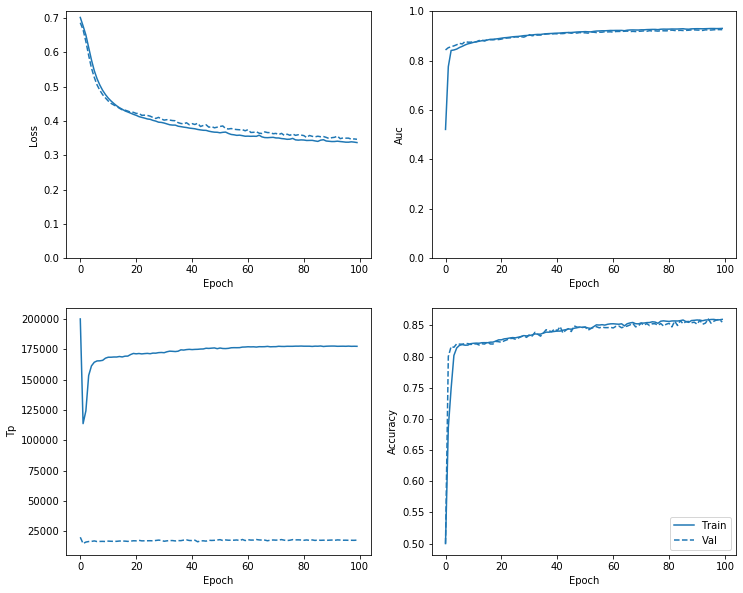

In [36]:
plot_metrics(baseline_history)

Text(0, 0.5, 'fraction')

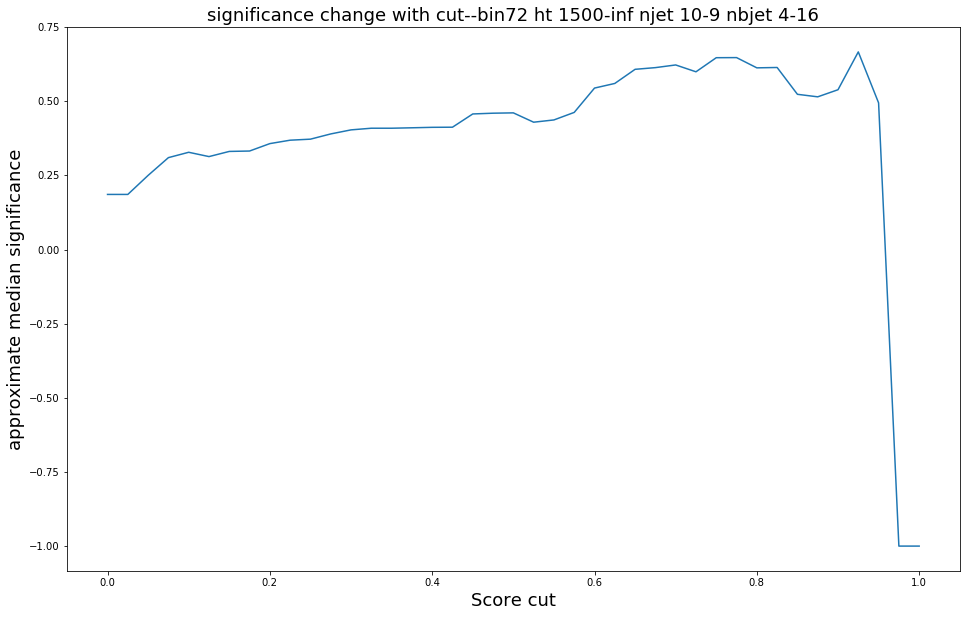

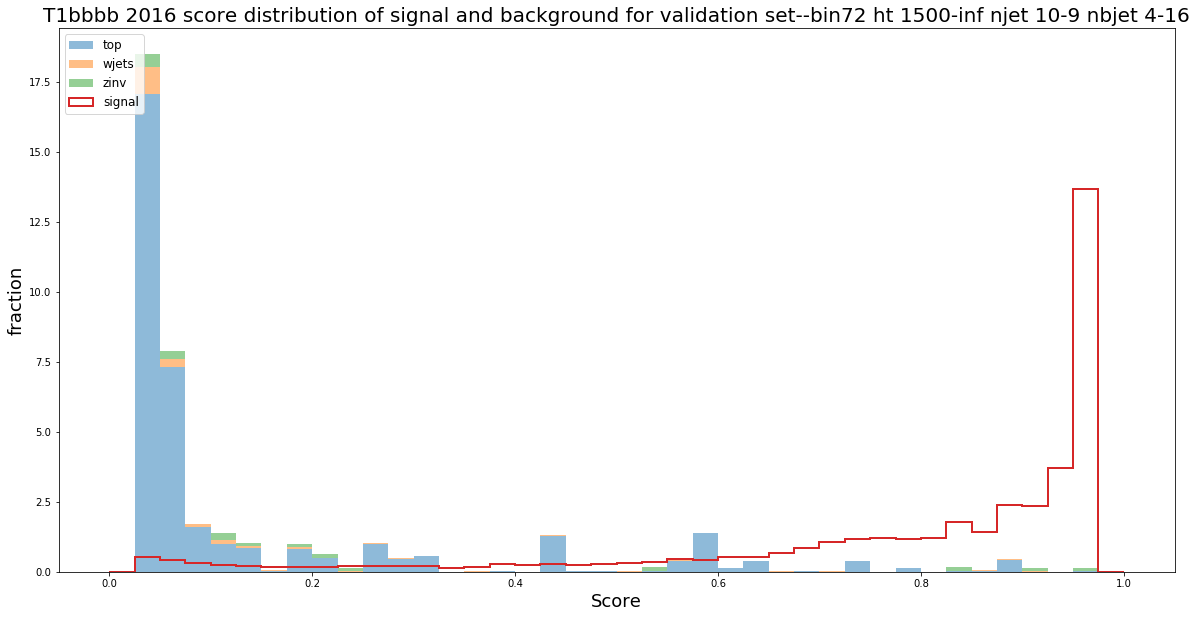

In [52]:
val=pd.concat([X_val,y_val],axis=1)
val[b'MLscore']=model.predict(val[features_train[:]], batch_size=10000)
midsig=[]
m1=2400
m2=200
for cut in np.arange(0, 1.025,0.025):
        midsig.append(significance(val,m1,m2,MLuse_sig[i]*0.1,MLuse_bkg[i]*0.1,cut,sigtag=b'sigtag',score=b'MLscore'))
figmidsig=plt.figure(figsize=(16,10))
axmidsig = figmidsig.add_subplot(111)
axmidsig.plot(np.arange(0, 1.025,0.025),midsig)
axmidsig.set_title("significance change with cut--bin"+str(i)+" ht "+str(selections[i][0][0])
                       +"-"+str(selections[i][0][1])+" njet "+str(selections[i][1][0])+"-"+str(selections[i][1][0]-1)
                       +" nbjet "+str(selections[i][2][0])+"-"+str(selections[i][2][1]),fontsize=18)
axmidsig.set_xlabel('Score cut',fontsize=18)
axmidsig.set_ylabel('approximate median significance',fontsize=18)
figscore = plt.figure(figsize=(20,10))
axscore = figscore.add_subplot(111)
bkgscore=[val[(val[b'bkgtype']==0)|(val[b'bkgtype']==1)][b'MLscore'], \
         val[val[b'bkgtype']==2][b'MLscore'],
         val[val[b'bkgtype']==3][b'MLscore']]
bkgweight=[val[(val[b'bkgtype']==0)|(val[b'bkgtype']==1)][b'evt_scale1fb'], \
         val[val[b'bkgtype']==2][b'evt_scale1fb'],
         val[val[b'bkgtype']==3][b'evt_scale1fb']]
bkgname=['top','wjets','zinv']
axscore.hist(bkgscore,bins=np.arange(0,1.025,0.025),stacked=True,alpha=0.5,label=bkgname,density=True,weights=bkgweight)
axscore.hist(val[val[b'sigtag']==1][b'MLscore'],bins=np.arange(0,1.025,0.025),alpha=1,label='signal',density=True,histtype='step',linewidth=2)
axscore.legend(loc='upper left',prop={'size': 12})
axscore.set_title("T1bbbb 2016 score distribution of signal and background for validation set--bin"+str(i)+" ht "+str(selections[i][0][0])
                       +"-"+str(selections[i][0][1])+" njet "+str(selections[i][1][0])+"-"+str(selections[i][1][0]-1)
                       +" nbjet "+str(selections[i][2][0])+"-"+str(selections[i][2][1]),fontsize=20)
axscore.set_xlabel('Score',fontsize=18)
axscore.set_ylabel('fraction',fontsize=18)

In [53]:
val[val[b'GenSusyMScan1']==2400]

,b'deltaPhiMin',b'diffMetMht',b'mht_pt',b'met_pt',b'mht_phi',b'met_phi',b'jet1_eta',b'jet1_phi',b'jet1_pt',b'jet1_btagDeepCSV',...,b'jet3_phi',b'jet3_pt',b'jet3_btagDeepCSV',b'evt_scale1fb',b'GenSusyMScan1',b'GenSusyMScan2',b'absweight',b'bkgtype',b'sigtag',b'MLscore'
12,1.880408,29.866327,1134.841675,1116.940186,-2.013947,-1.992712,0.438947,1.118763,760.582825,0.302754,...,-0.112304,205.868774,0.043951,1.0,2500,1400,0.000372,-1,1,0.970194
81,1.184270,62.989601,368.837433,330.406281,-0.264635,-0.407720,-1.261873,-2.489326,755.929749,0.039402,...,0.776550,72.737198,-2.000000,1.0,2500,1300,0.000295,-1,1,0.091633
144,0.882997,7.904381,570.225037,572.170837,0.621487,0.608075,-0.136504,-2.824335,663.719421,0.368888,...,1.491072,288.599731,0.478588,1.0,2500,1200,0.000305,-1,1,0.950058
222,0.772813,157.035202,313.805969,443.233948,-2.237594,-1.998575,-0.014314,1.620966,718.781250,0.439092,...,0.933763,68.732262,0.016282,1.0,2500,1850,0.000297,-1,1,0.771942
254,2.425782,83.521584,1223.735962,1296.371826,-1.319605,-1.352341,-0.166811,2.505062,534.667908,0.260432,...,1.458988,436.430054,0.127028,1.0,2500,900,0.000464,-1,1,0.973688
258,0.691139,153.769714,806.908813,714.711853,-0.847495,-0.685265,-0.108245,2.836876,812.680176,0.494028,...,-1.376405,211.782349,0.269677,1.0,2500,900,0.000094,-1,1,0.972255
458,0.733183,11.039785,510.034790,514.923096,-0.270586,-0.251271,-0.845131,-2.558960,720.310974,0.126207,...,0.481913,285.960663,0.614676,1.0,2500,1600,0.000540,-1,1,0.946904


(array([9393.,    0.,    0.,  141.,   65.,   70.,   81.,   53.,   61.,
          46.]),
 array([   0.,  280.,  560.,  840., 1120., 1400., 1680., 1960., 2240.,
        2520., 2800.]),
 <a list of 10 Patch objects>)

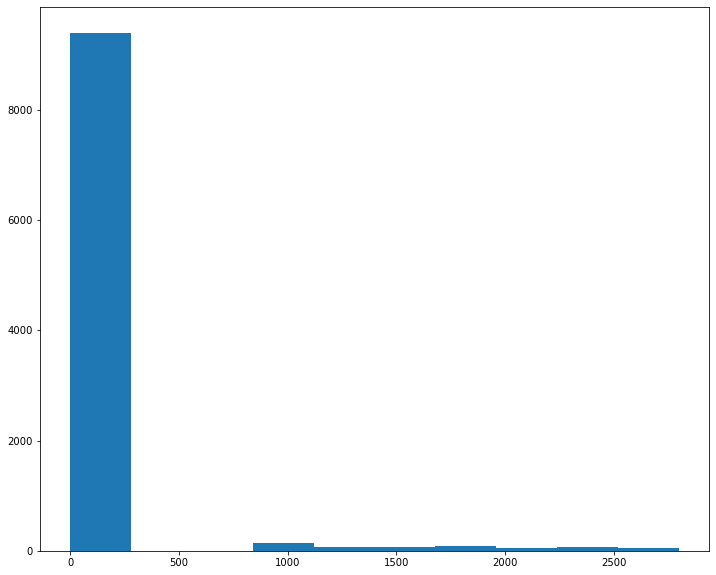

In [52]:
plt.hist(val[b'GenSusyMScan1'])

In [50]:
midsig

[0.30100817652254547,
 0.318964743831571,
 0.31941473064833076,
 0.32014837079092734,
 0.3209325967598198,
 0.32340603070494917,
 0.3275210371177736,
 0.3258404259644363,
 0.33491500030688237,
 0.30484302190543583,
 0.33514136984743303,
 0.2707827470877932,
 0.22935225965270256,
 0.13261645251001916,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]

In [ ]:
fig = plt.figure(figsize=(20,10))
ax0 = fig.add_subplot(111) 
score_test = []
num_rows=X.shape[0];
num_trainrows=int(num_rows*0.8);
num_varows=int(num_rows*0.9);
num_fold=9;
kf = KFold(n_splits=num_fold,shuffle=True)
j=1;
X.reset_index()
y.reset_index()
indexlist=list(X.index);
for i in range(500):
    rd.shuffle(indexlist);
sampling=indexlist[0:num_varows];
testing=indexlist[num_varows:-1];
X_test=X.loc[testing,:];
y_test=y.loc[testing];
scoretest=[];
testpredict=[];
importance=[];
importanceaver=[];
importancestd=[];
for train_index, va_index in kf.split(sampling):
    score_train = [];
    score_va = [];
 #   scoreroc_train=[];
 #   scoreroc_va=[];
    X_train = X.iloc[train_index,:];
    X_va = X.iloc[va_index,:];
    y_train=y.iloc[train_index];
    y_va = y.iloc[va_index];
    for i in range(1,11):
    #Paramterize the model and let i be the number of minimum instances per leaf node
        classify_model=GradientBoostingClassifier(n_estimators=50, learning_rate=0.02*i, max_features=2, max_depth=4, random_state=0)
        classify_model.fit(X_train.iloc[:,:],y_train.iloc[:]);
    #Predict query instances
        predicted_train = classify_model.predict(X_train.iloc[:,:]);
        predicted_va = classify_model.predict(X_va.iloc[:,:]);
        
    #Calculate and append the scores
#        scoreroc_train.append(roc_auc_score(y_train.iloc[:], predicted_train))
 #       scoreroc_va.append(roc_auc_score(y_va.iloc[:], predicted_va))
        score_train.append(classify_model.score(X_train.iloc[:,:],y_train.iloc[:]));
        score_va.append(classify_model.score(X_va.iloc[:,:],y_va.iloc[:]));
        if  i==7:
            importance.append(list(classify_model.feature_importances_));    
            scoretest.append(classify_model.score(X_test.iloc[:,:],y_test.iloc[:]));
            testpredict.append(list(classify_model.predict(X_test.iloc[:,:])));
#            print(predicted_va[1:50])
 #           print(predicted_train[1:50])
                               
    ax0.plot(range(1,11),score_va,'--',label='Va_Data'+str(j));
    ax0.plot(range(1,11),score_train,label='Train_Data'+str(j));
    j=j+1;
# Shrink current axis by 20%
testpredictaver=[];
for i in range(X_test.shape[0]):
    sum1=0;
    count=0;
    for j in range(len(testpredict)):
        count=count+1;
        sum1=sum1+testpredict[j][i];
    testpredictaver.append(sum1/count);
    
for i in range(len(importance[0])):
    sum1=0;
    sum1square=0;
    count=0;
    for j in range(len(testpredict)):
        count=count+1;
        sum1=sum1+importance[j][i];
        sum1square=sum1square+importance[j][i]**2;
    importanceaver.append(sum1/count);
    importancestd.append(sqrt(sum1square/count-(sum1/count)**2))
indices = np.argsort(importanceaver)[::-1]
box = ax0.get_position()
ax0.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax0.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 14})
ax0.set_title('score with respect to learing rate',size=20)
ax0.set_xlabel('learning rate*50',fontsize=18)
ax0.set_ylabel('score',fontsize=18)

In [24]:
np.max([1,2,3])

3

train on  7447  background 162265  signals, validate on  828 background 18030 signals
486795 486795 54090 54090
Train on 973590 samples, validate on 108180 samples
Epoch 1/10
960000/973590 [============================>.] - ETA: 0s - loss: 0.6899 - tp: 384929.0000 - fp: 189848.0000 - tn: 290074.0000 - fn: 95149.0000 - accuracy: 0.7031 - precision: 0.6697 - recall: 0.8018 - auc: 0.7109
Epoch 00001: val_accuracy improved from -inf to 0.84855, saving model to weights_T1bbbb_bin_33.best.hdf5
973590/973590 [==============================] - 4s 4us/sample - loss: 0.6898 - tp: 390512.0000 - fp: 191024.0000 - tn: 295771.0000 - fn: 96283.0000 - accuracy: 0.7049 - precision: 0.6715 - recall: 0.8022 - auc: 0.7143 - val_loss: 0.6813 - val_tp: 45542.0000 - val_fp: 7836.0000 - val_tn: 46254.0000 - val_fn: 8548.0000 - val_accuracy: 0.8485 - val_precision: 0.8532 - val_recall: 0.8420 - val_auc: 0.8950
Epoch 2/10
960000/973590 [============================>.] - ETA: 0s - loss: 0.6579 - tp: 402950.0000 

Epoch 2/10
580000/581076 [============================>.] - ETA: 0s - loss: 0.6929 - tp: 160734.0000 - fp: 155815.0000 - tn: 134182.0000 - fn: 129269.0000 - accuracy: 0.5085 - precision: 0.5078 - recall: 0.5542 - auc: 0.5146
Epoch 00002: val_accuracy did not improve from 0.50000
581076/581076 [==============================] - 2s 3us/sample - loss: 0.6929 - tp: 160742.0000 - fp: 155818.0000 - tn: 134720.0000 - fn: 129796.0000 - accuracy: 0.5085 - precision: 0.5078 - recall: 0.5533 - auc: 0.5146 - val_loss: 0.6924 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 32283.0000 - val_fn: 32283.0000 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5890
Epoch 3/10
580000/581076 [============================>.] - ETA: 0s - loss: 0.6918 - tp: 49870.0000 - fp: 28991.0000 - tn: 260993.0000 - fn: 240146.0000 - accuracy: 0.5360 - precision: 0.6324 - recall: 0.1720 - auc: 0.5920
Epoch 00003: val_accuracy improved from 0.50000 to 0.60636, saving model to weig

Epoch 3/10
1220000/1224450 [============================>.] - ETA: 0s - loss: 0.6864 - tp: 371626.0000 - fp: 207936.0000 - tn: 402078.0000 - fn: 238360.0000 - accuracy: 0.6342 - precision: 0.6412 - recall: 0.6092 - auc: 0.6495
Epoch 00003: val_accuracy improved from 0.64554 to 0.65360, saving model to weights_T1bbbb_bin_20.best.hdf5
1224450/1224450 [==============================] - 4s 3us/sample - loss: 0.6864 - tp: 373022.0000 - fp: 208712.0000 - tn: 403513.0000 - fn: 239203.0000 - accuracy: 0.6342 - precision: 0.6412 - recall: 0.6093 - auc: 0.6495 - val_loss: 0.6815 - val_tp: 39689.0000 - val_fp: 18791.0000 - val_tn: 49237.0000 - val_fn: 28339.0000 - val_accuracy: 0.6536 - val_precision: 0.6787 - val_recall: 0.5834 - val_auc: 0.6873
Epoch 4/10
1220000/1224450 [============================>.] - ETA: 0s - loss: 0.6787 - tp: 386264.0000 - fp: 222925.0000 - tn: 387077.0000 - fn: 223734.0000 - accuracy: 0.6339 - precision: 0.6341 - recall: 0.6332 - auc: 0.6529
Epoch 00004: val_accuracy i

120000/132018 [==========================>...] - ETA: 0s - loss: 0.9376 - tp: 59994.0000 - fp: 60006.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.4999 - precision: 0.4999 - recall: 1.0000 - auc: 0.4998
Epoch 00003: val_accuracy did not improve from 0.50000
132018/132018 [==============================] - 0s 3us/sample - loss: 0.9363 - tp: 66009.0000 - fp: 66009.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - auc: 0.4997 - val_loss: 0.9202 - val_tp: 7335.0000 - val_fp: 7335.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 4/10
120000/132018 [==========================>...] - ETA: 0s - loss: 0.9105 - tp: 60036.0000 - fp: 59964.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.5003 - precision: 0.5003 - recall: 1.0000 - auc: 0.4979
Epoch 00004: val_accuracy did not improve from 0.50000
132018/132018 [==============================] - 0s 3us/

220000/233634 [===========================>..] - ETA: 0s - loss: 0.6925 - tp: 109978.0000 - fp: 109668.0000 - tn: 240.0000 - fn: 114.0000 - accuracy: 0.5010 - precision: 0.5007 - recall: 0.9990 - auc: 0.5632
Epoch 00004: val_accuracy did not improve from 0.50000
233634/233634 [==============================] - 1s 3us/sample - loss: 0.6925 - tp: 116653.0000 - fp: 116483.0000 - tn: 334.0000 - fn: 164.0000 - accuracy: 0.5007 - precision: 0.5004 - recall: 0.9986 - auc: 0.5637 - val_loss: 0.6922 - val_tp: 12981.0000 - val_fp: 12981.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - val_auc: 0.5961
Epoch 5/10
220000/233634 [===========================>..] - ETA: 0s - loss: 0.6921 - tp: 92964.0000 - fp: 83944.0000 - tn: 26051.0000 - fn: 17041.0000 - accuracy: 0.5410 - precision: 0.5255 - recall: 0.8451 - auc: 0.5724
Epoch 00005: val_accuracy improved from 0.50000 to 0.61409, saving model to weights_T1bbbb_bin_13.best.hdf5
23363

180000/180684 [============================>.] - ETA: 0s - loss: 0.9187 - tp: 89993.0000 - fp: 90007.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - auc: 0.4995
Epoch 00005: val_accuracy did not improve from 0.50000
180684/180684 [==============================] - 1s 3us/sample - loss: 0.9186 - tp: 90342.0000 - fp: 90342.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - auc: 0.4995 - val_loss: 0.8936 - val_tp: 10038.0000 - val_fp: 10038.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 6/10
180000/180684 [============================>.] - ETA: 0s - loss: 0.8793 - tp: 89973.0000 - fp: 90027.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.4999 - precision: 0.4999 - recall: 1.0000 - auc: 0.5009
Epoch 00006: val_accuracy did not improve from 0.50000
180684/180684 [==============================] - 1s 3u

440000/468696 [===========================>..] - ETA: 0s - loss: 0.6524 - tp: 175968.0000 - fp: 42609.0000 - tn: 177308.0000 - fn: 44115.0000 - accuracy: 0.8029 - precision: 0.8051 - recall: 0.7996 - auc: 0.8341
Epoch 00006: val_accuracy improved from 0.82951 to 0.83233, saving model to weights_T1bbbb_bin_27.best.hdf5
468696/468696 [==============================] - 1s 3us/sample - loss: 0.6518 - tp: 187533.0000 - fp: 45463.0000 - tn: 188885.0000 - fn: 46815.0000 - accuracy: 0.8031 - precision: 0.8049 - recall: 0.8002 - auc: 0.8341 - val_loss: 0.6362 - val_tp: 21303.0000 - val_fp: 3995.0000 - val_tn: 22045.0000 - val_fn: 4737.0000 - val_accuracy: 0.8323 - val_precision: 0.8421 - val_recall: 0.8181 - val_auc: 0.8627
Epoch 7/10
460000/468696 [============================>.] - ETA: 0s - loss: 0.6312 - tp: 188009.0000 - fp: 46038.0000 - tn: 183968.0000 - fn: 41985.0000 - accuracy: 0.8086 - precision: 0.8033 - recall: 0.8175 - auc: 0.8384
Epoch 00007: val_accuracy improved from 0.83233 to 0

/work/wjin/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/work/wjin/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


train on  197  background 13419  signals, validate on  22 background 1492 signals
40257 40257 4476 4476
Train on 80514 samples, validate on 8952 samples
Epoch 1/10
80000/80514 [============================>.] - ETA: 0s - loss: 0.6946 - tp: 40008.0000 - fp: 39992.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.5001 - precision: 0.5001 - recall: 1.0000 - auc: 0.4815
Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to weights_T1bbbb_bin_57.best.hdf5
80514/80514 [==============================] - 1s 19us/sample - loss: 0.6946 - tp: 40257.0000 - fp: 40257.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - auc: 0.4819 - val_loss: 0.6935 - val_tp: 4476.0000 - val_fp: 4476.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 2/10
60000/80514 [=====================>........] - ETA: 0s - loss: 0.6933 - tp: 29935.0000 - fp: 30065.0000 - tn: 

/work/wjin/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


train on  878  background 150187  signals, validate on  98 background 16688 signals
450561 450561 50064 50064
Train on 901122 samples, validate on 100128 samples
Epoch 1/10
900000/901122 [============================>.] - ETA: 0s - loss: 0.7108 - tp: 450000.0000 - fp: 450000.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - auc: 0.5265
Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to weights_T1bbbb_bin_34.best.hdf5
901122/901122 [==============================] - 4s 5us/sample - loss: 0.7108 - tp: 450561.0000 - fp: 450561.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - auc: 0.5266 - val_loss: 0.6828 - val_tp: 50064.0000 - val_fp: 50064.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - val_auc: 0.8726
Epoch 2/10
900000/901122 [============================>.] - ETA: 0s - loss: 0.6647 - tp: 384494.0000 - 

400000/402504 [============================>.] - ETA: 0s - loss: 0.7209 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 200006.0000 - fn: 199994.0000 - accuracy: 0.5000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5120
Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to weights_T1bbbb_bin_66.best.hdf5
402504/402504 [==============================] - 3s 6us/sample - loss: 0.7208 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 201252.0000 - fn: 201252.0000 - accuracy: 0.5000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5120 - val_loss: 0.7057 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 22362.0000 - val_fn: 22362.0000 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5115
Epoch 2/10
400000/402504 [============================>.] - ETA: 0s - loss: 0.6969 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 199979.0000 - fn: 200021.0000 - accuracy: 0.4999 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5765
Epoch 00002: val_accu

Train on 193230 samples, validate on 21474 samples
Epoch 1/10
180000/193230 [==========================>...] - ETA: 0s - loss: 0.7478 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 89894.0000 - fn: 90106.0000 - accuracy: 0.4994 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5308
Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to weights_T1bbbb_bin_67.best.hdf5
193230/193230 [==============================] - 2s 9us/sample - loss: 0.7468 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 96615.0000 - fn: 96615.0000 - accuracy: 0.5000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5267 - val_loss: 0.7367 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 10737.0000 - val_fn: 10737.0000 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/10
180000/193230 [==========================>...] - ETA: 0s - loss: 0.7301 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 90072.0000 - fn: 89928.0000 - accuracy: 0.5004 - precision: 0.0000e+00 

Epoch 2/10
440000/443232 [============================>.] - ETA: 0s - loss: 0.9873 - tp: 219997.0000 - fp: 220003.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - auc: 0.5114
Epoch 00002: val_accuracy did not improve from 0.50000
443232/443232 [==============================] - 2s 4us/sample - loss: 0.9869 - tp: 221616.0000 - fp: 221616.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - auc: 0.5114 - val_loss: 0.9328 - val_tp: 24624.0000 - val_fp: 24624.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - val_auc: 0.7670
Epoch 3/10
440000/443232 [============================>.] - ETA: 0s - loss: 0.8903 - tp: 220000.0000 - fp: 220000.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - auc: 0.5398
Epoch 00003: val_accuracy did not improve from 0.50000
443232/443232 [======================

Epoch 3/10
600000/619560 [============================>.] - ETA: 0s - loss: 0.6717 - tp: 278969.0000 - fp: 149438.0000 - tn: 150604.0000 - fn: 20989.0000 - accuracy: 0.7160 - precision: 0.6512 - recall: 0.9300 - auc: 0.8687
Epoch 00003: val_accuracy improved from 0.77510 to 0.83525, saving model to weights_T1bbbb_bin_32.best.hdf5
619560/619560 [==============================] - 2s 3us/sample - loss: 0.6714 - tp: 287832.0000 - fp: 152748.0000 - tn: 157032.0000 - fn: 21948.0000 - accuracy: 0.7180 - precision: 0.6533 - recall: 0.9291 - auc: 0.8686 - val_loss: 0.6594 - val_tp: 30602.0000 - val_fp: 7522.0000 - val_tn: 26900.0000 - val_fn: 3820.0000 - val_accuracy: 0.8353 - val_precision: 0.8027 - val_recall: 0.8890 - val_auc: 0.8819
Epoch 4/10
580000/619560 [===========================>..] - ETA: 0s - loss: 0.6473 - tp: 255561.0000 - fp: 75845.0000 - tn: 214062.0000 - fn: 34532.0000 - accuracy: 0.8097 - precision: 0.7711 - recall: 0.8810 - auc: 0.8674
Epoch 00004: val_accuracy improved from

Epoch 4/10
220000/232584 [===========================>..] - ETA: 0s - loss: 0.9856 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 109987.0000 - fn: 110013.0000 - accuracy: 0.4999 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5010
Epoch 00004: val_accuracy did not improve from 0.50000
232584/232584 [==============================] - 1s 3us/sample - loss: 0.9843 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 116292.0000 - fn: 116292.0000 - accuracy: 0.5000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5009 - val_loss: 0.9577 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 12924.0000 - val_fn: 12924.0000 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 5/10
220000/232584 [===========================>..] - ETA: 0s - loss: 0.9373 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 110072.0000 - fn: 109928.0000 - accuracy: 0.5003 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5077
Epoch 00005: val_accuracy did not improve from 0.50000
23258

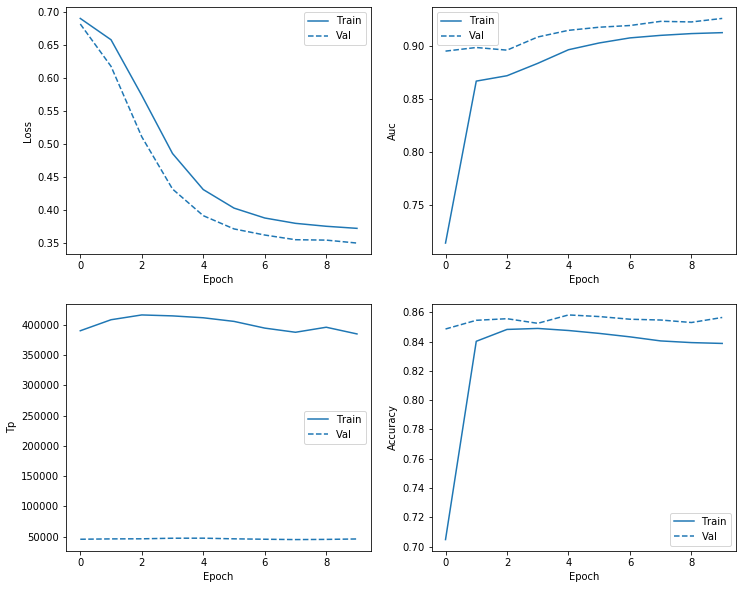

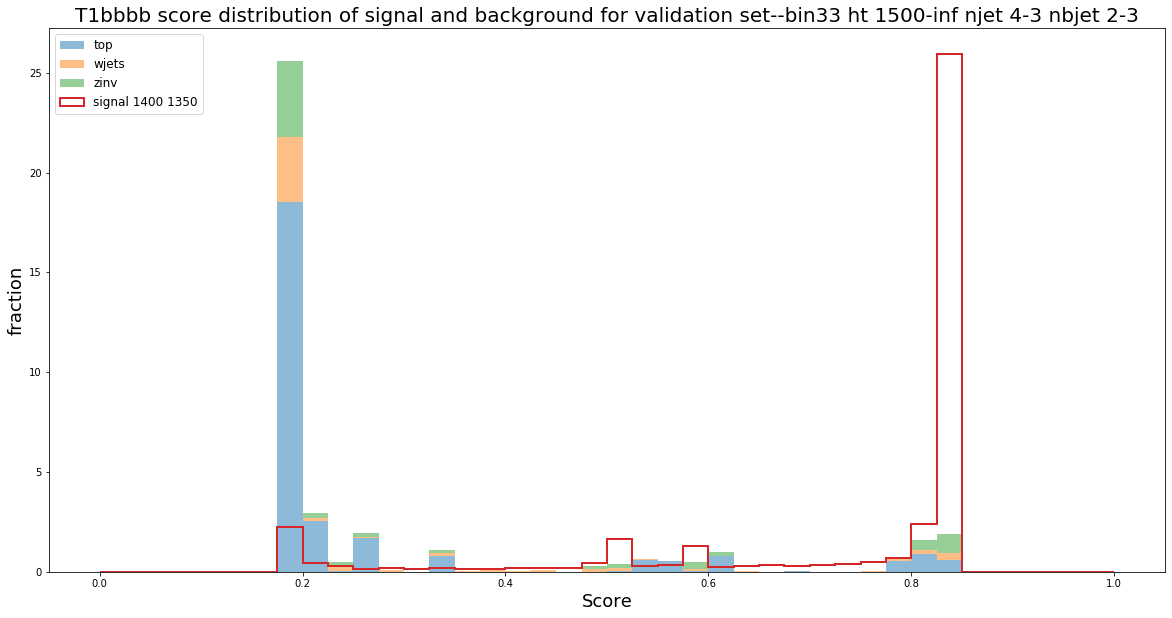

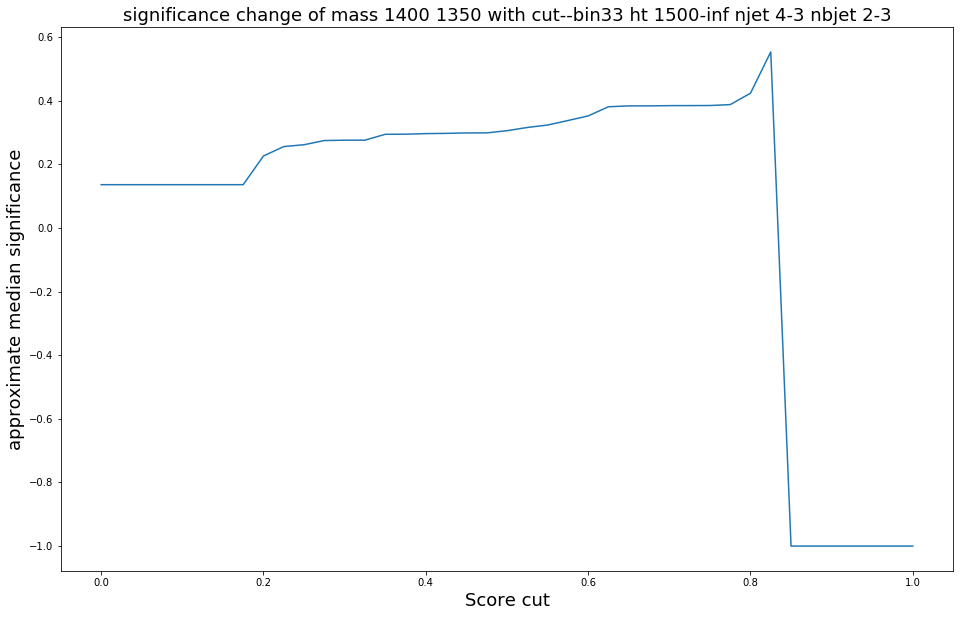

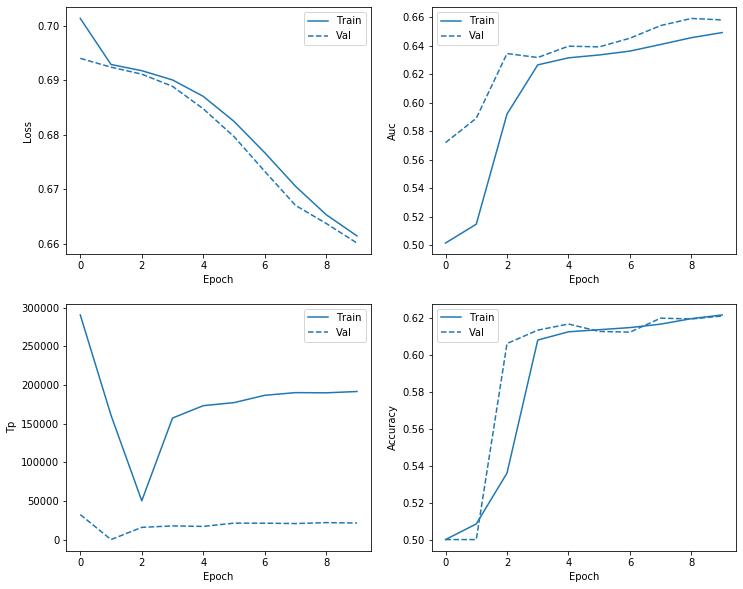

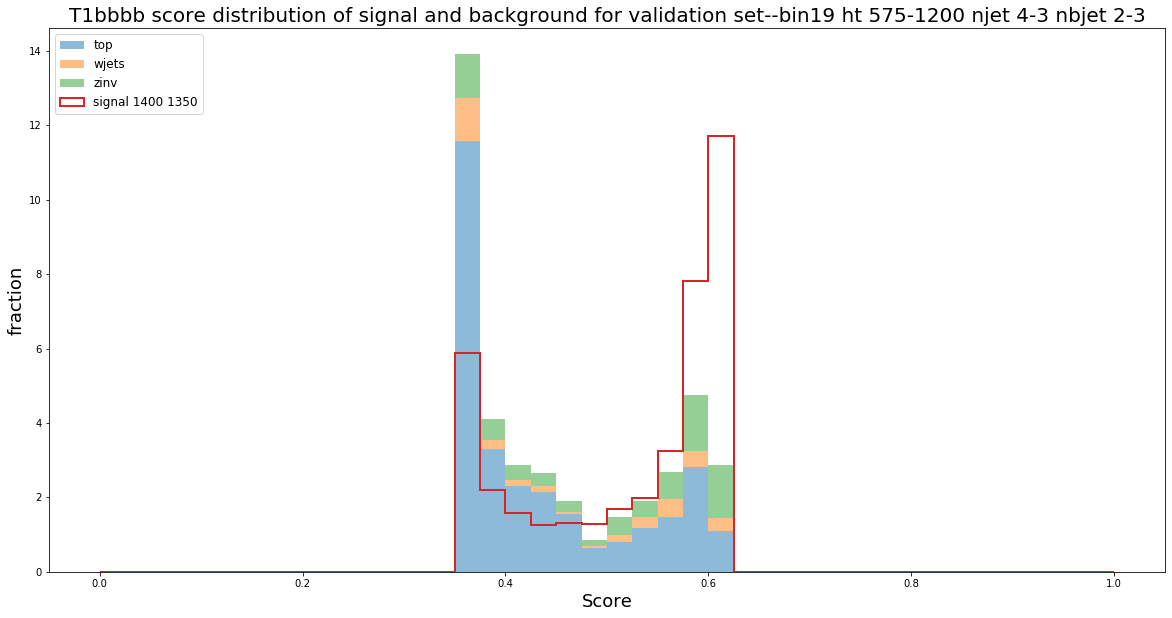

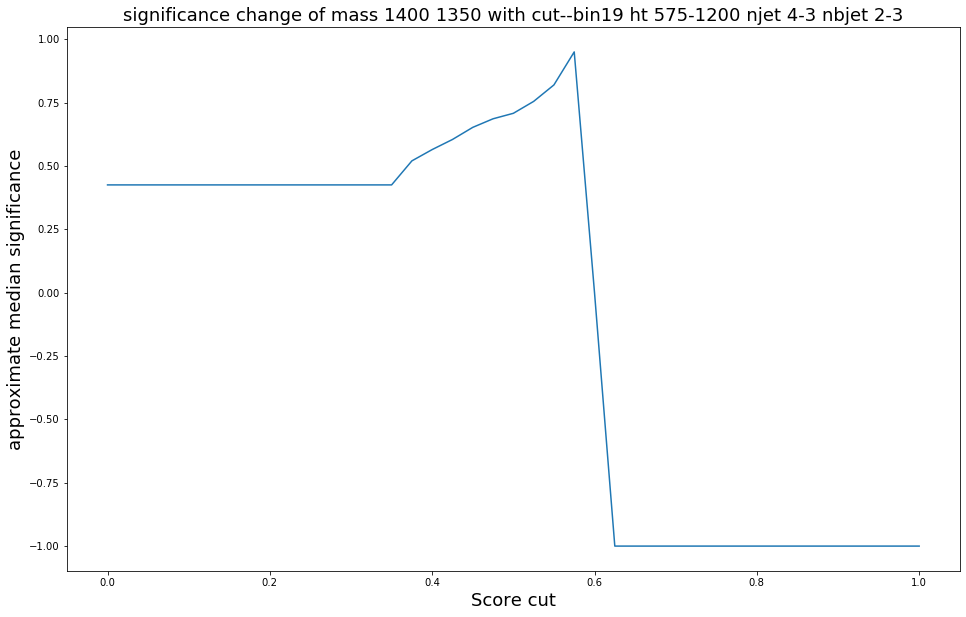

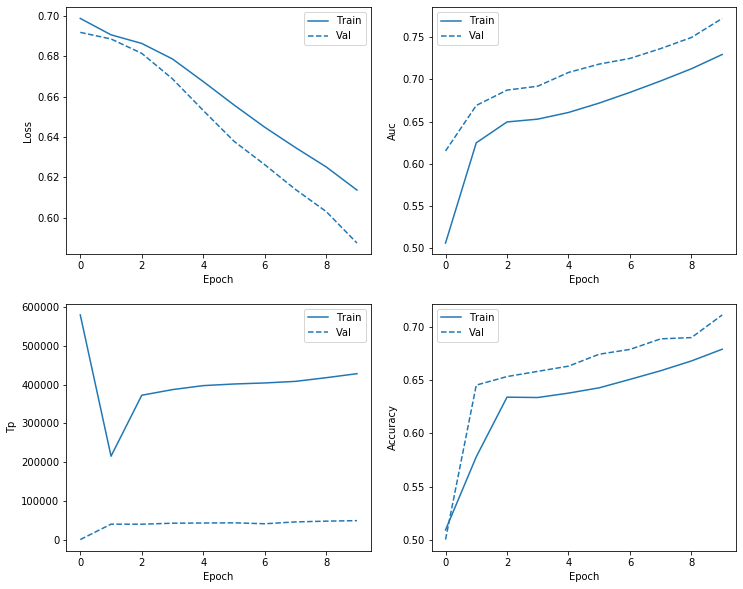

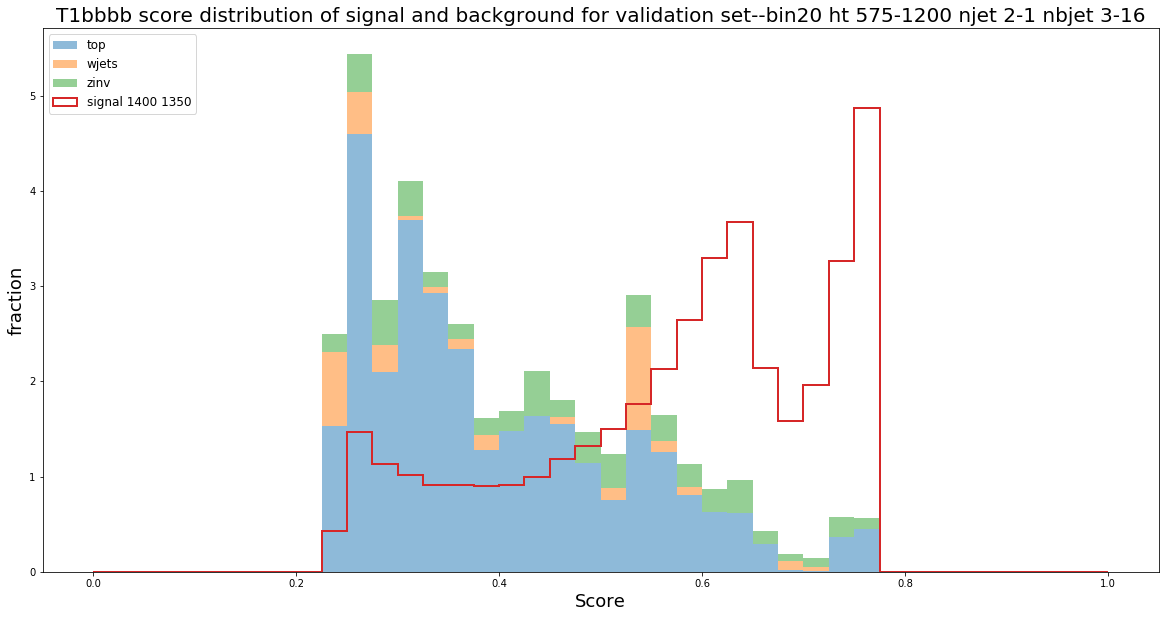

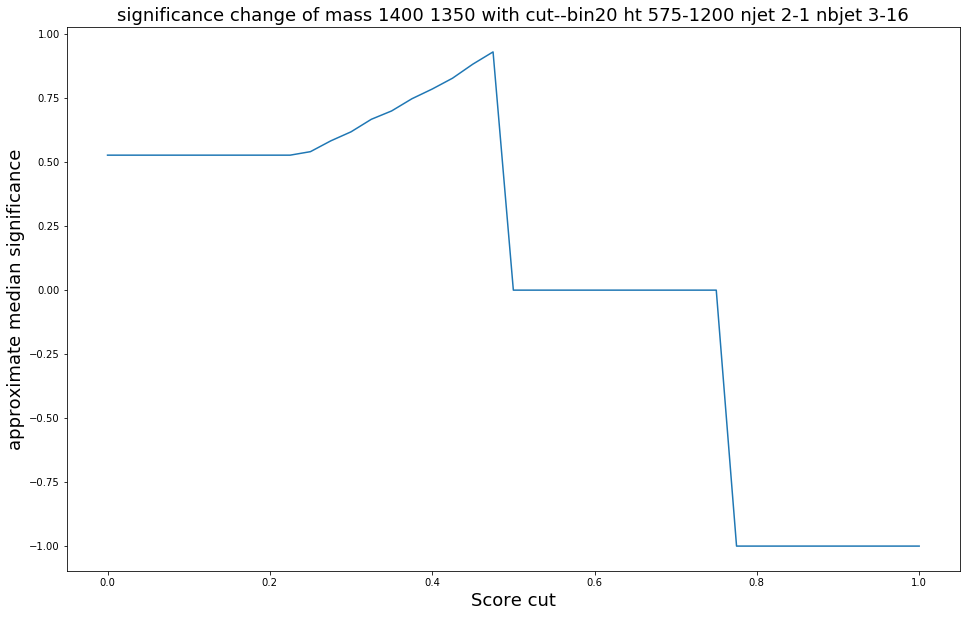

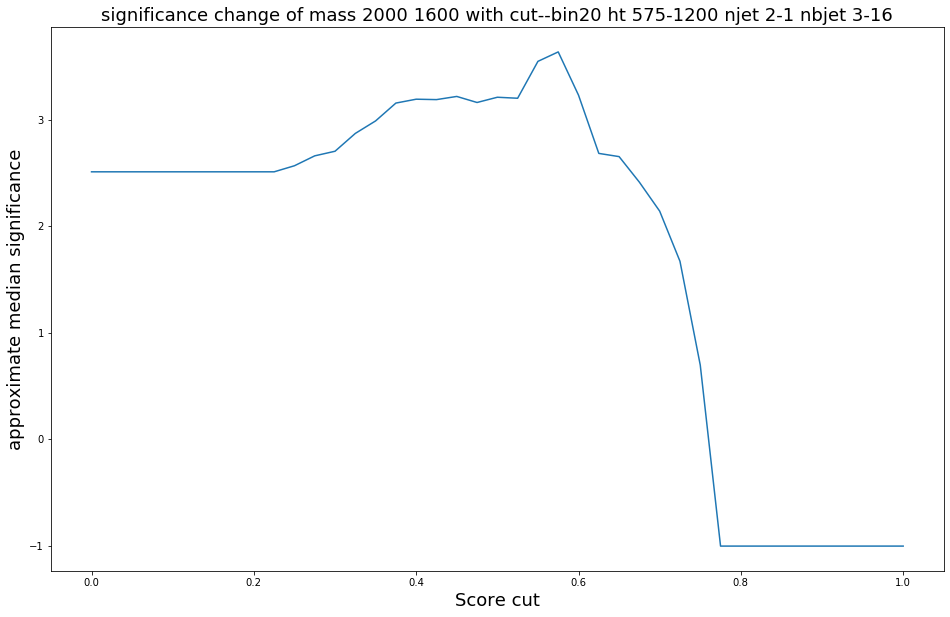

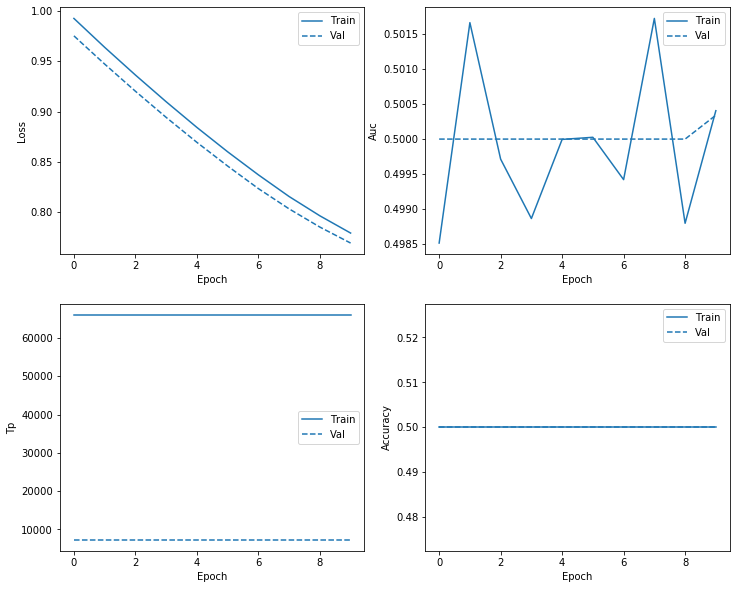

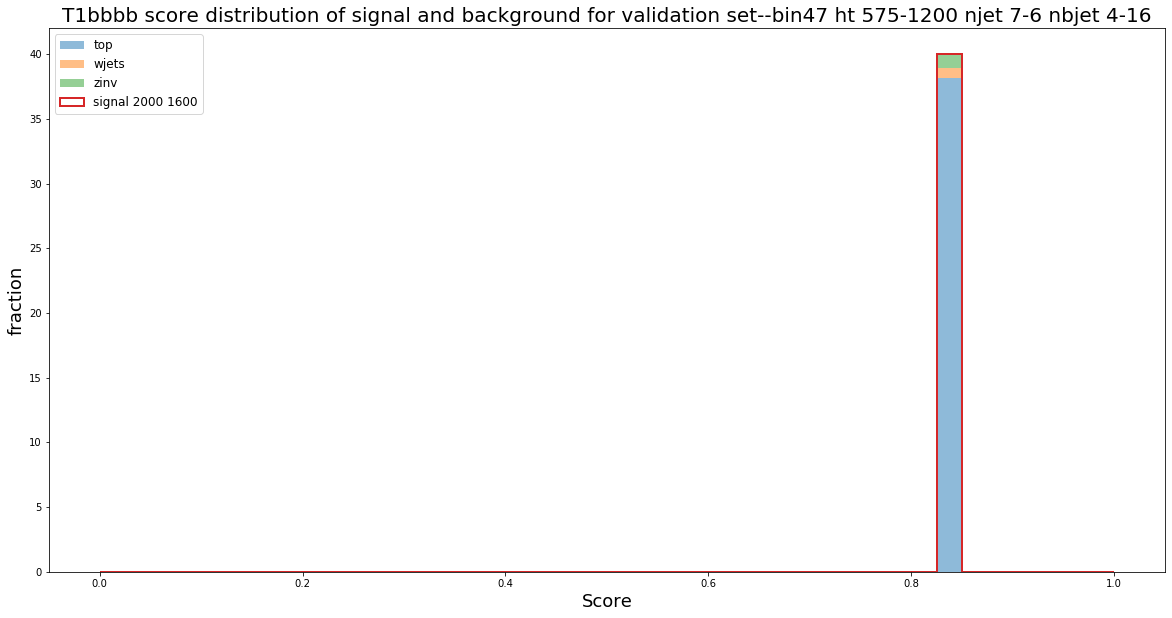

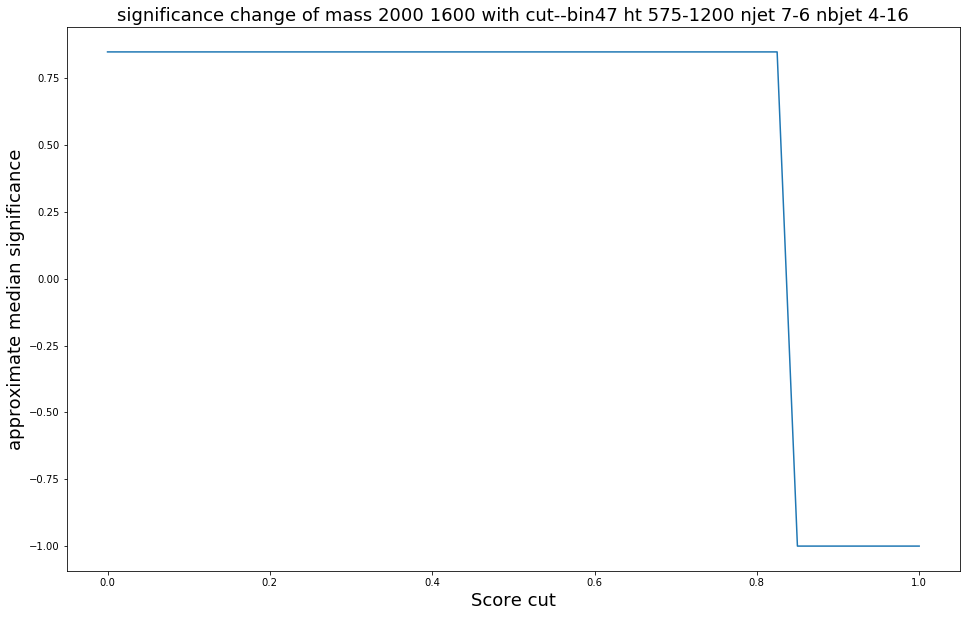

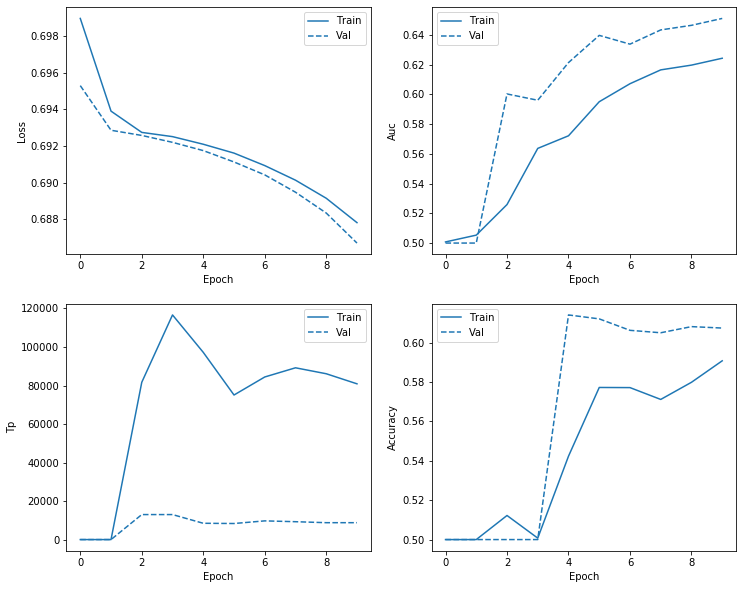

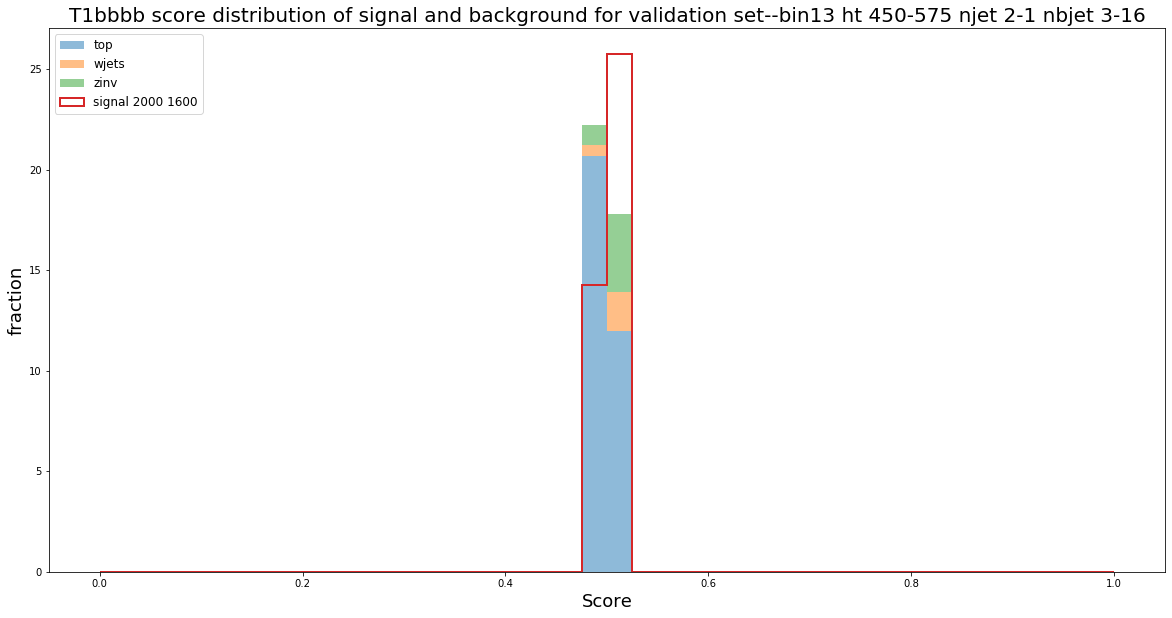

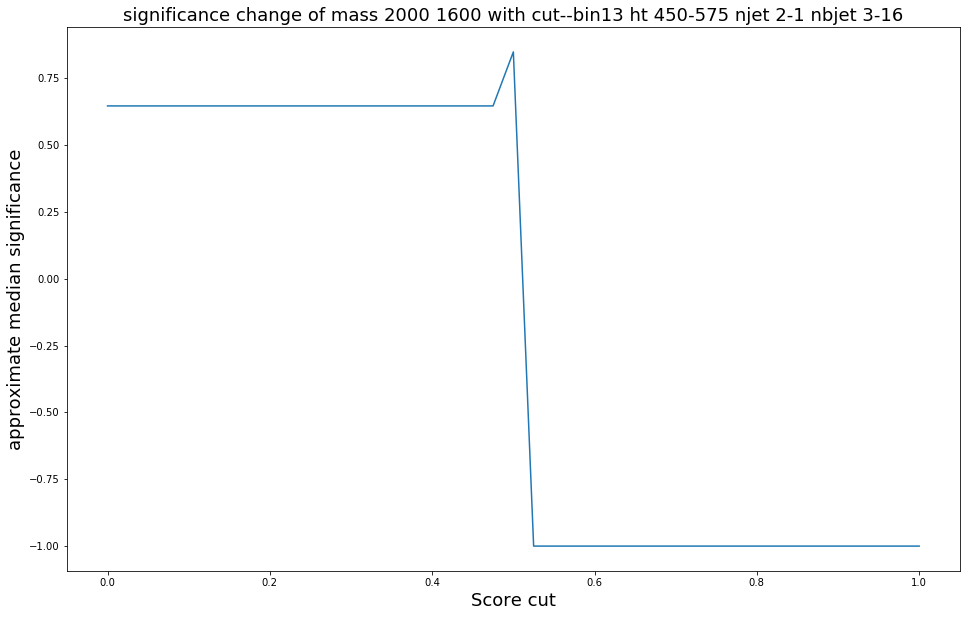

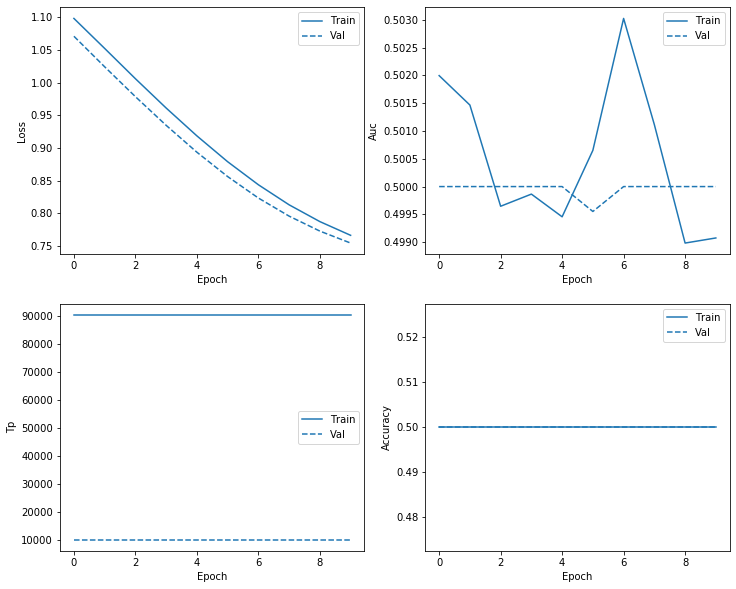

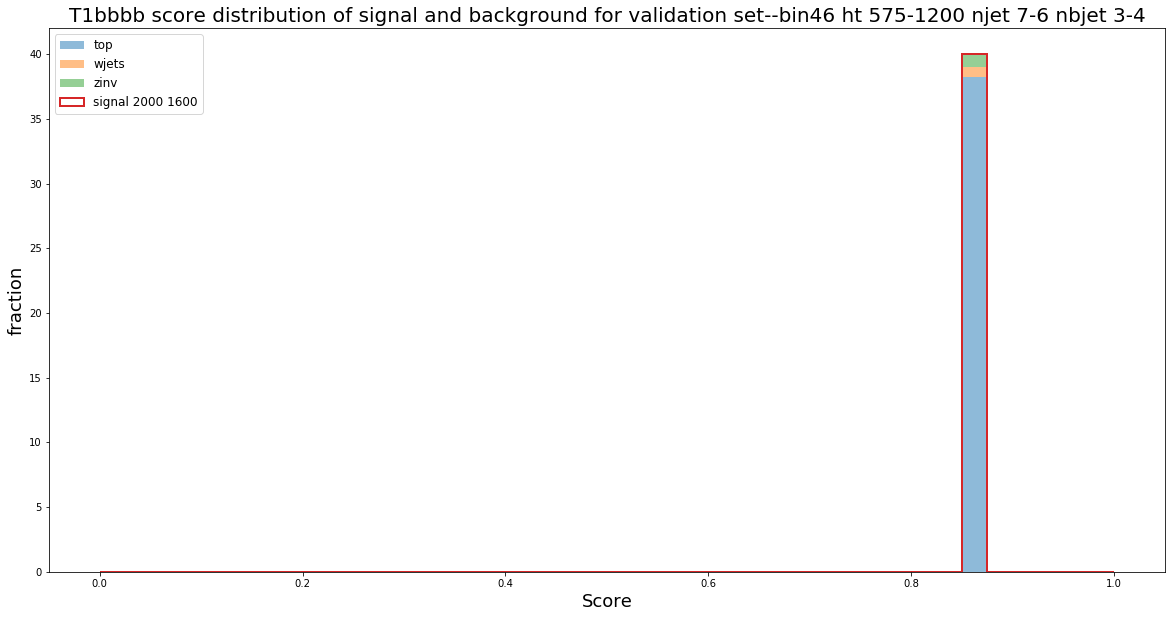

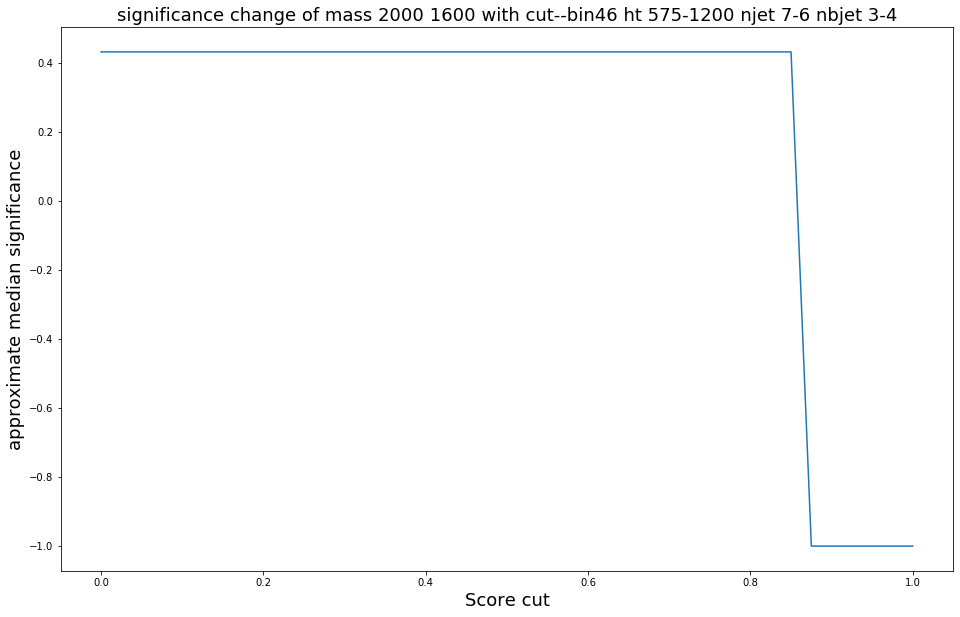

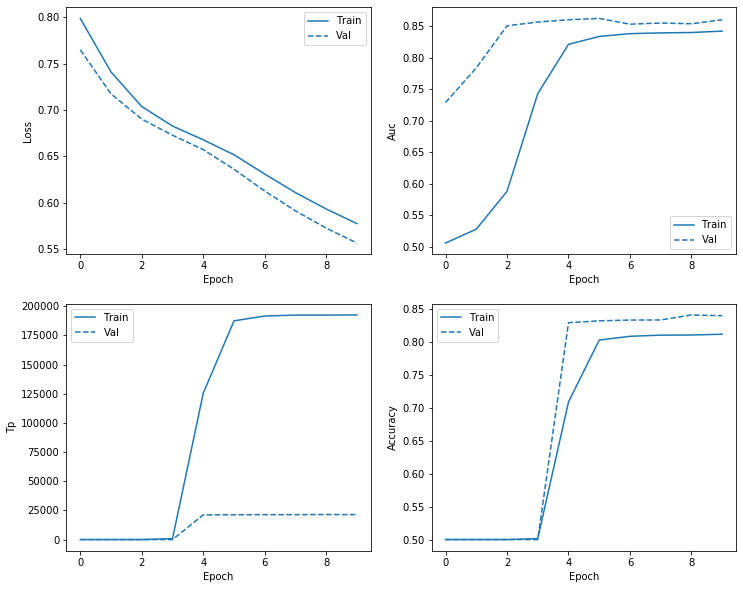

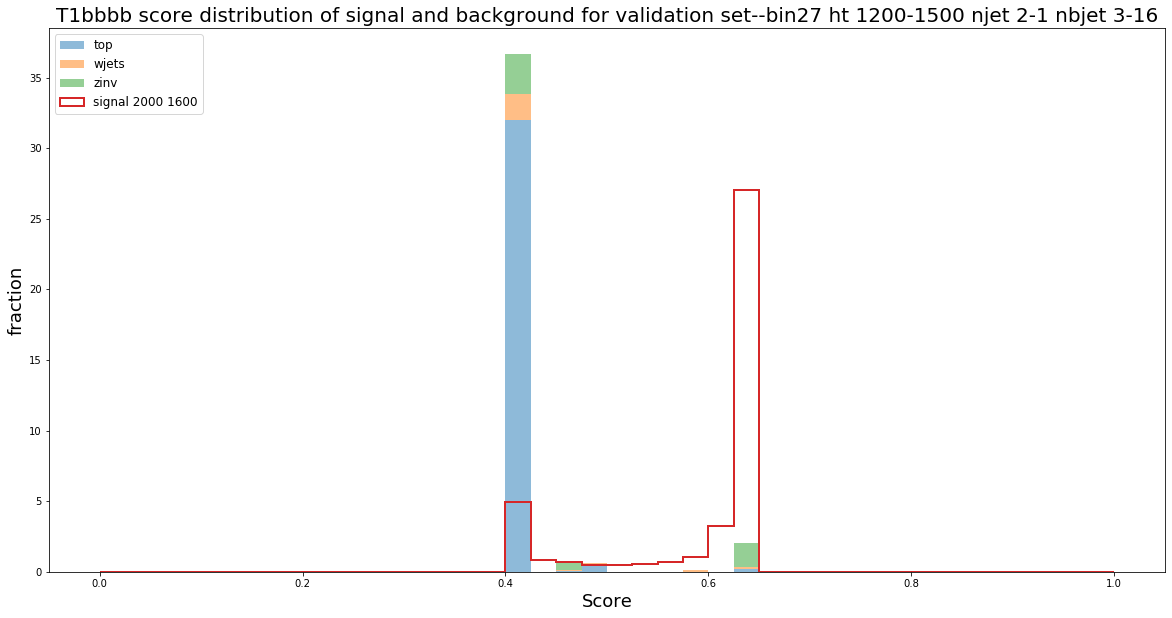

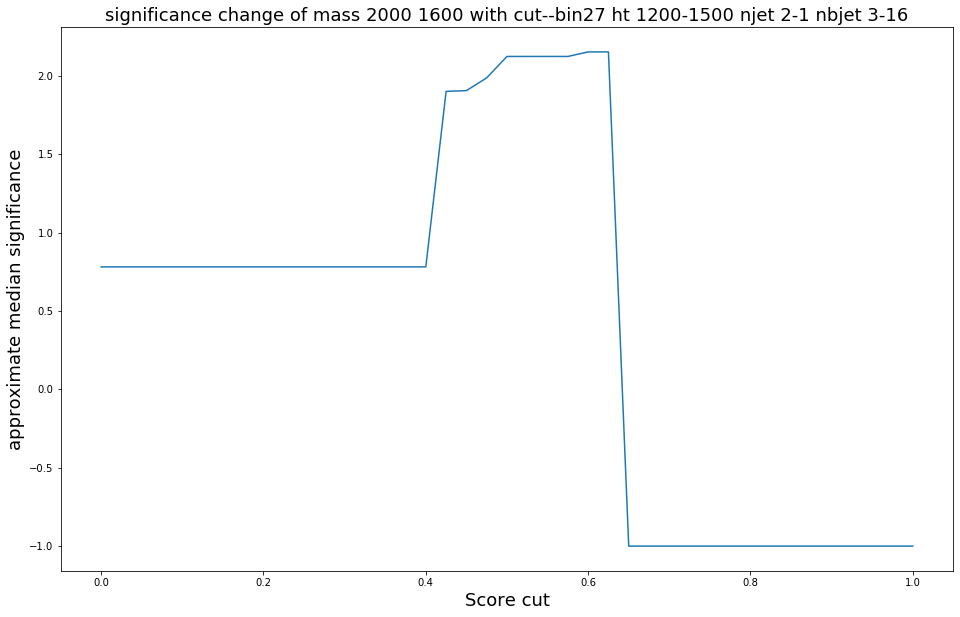

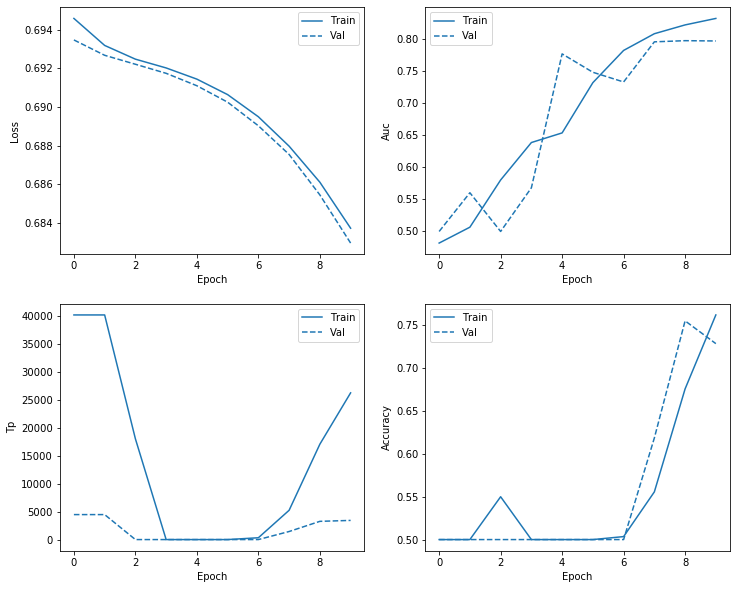

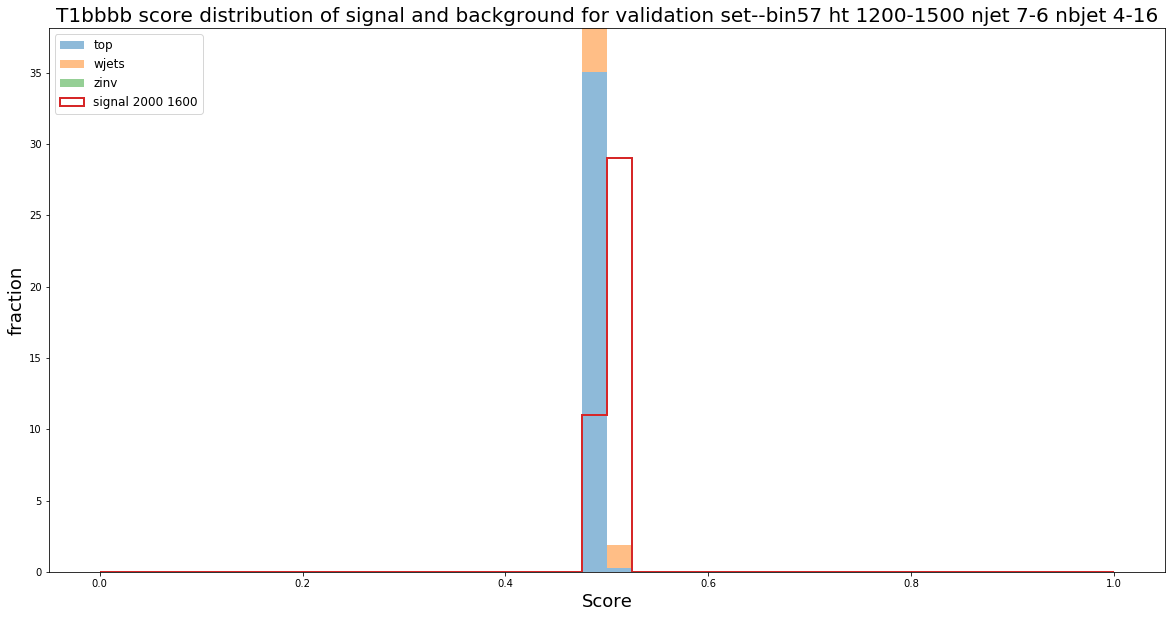

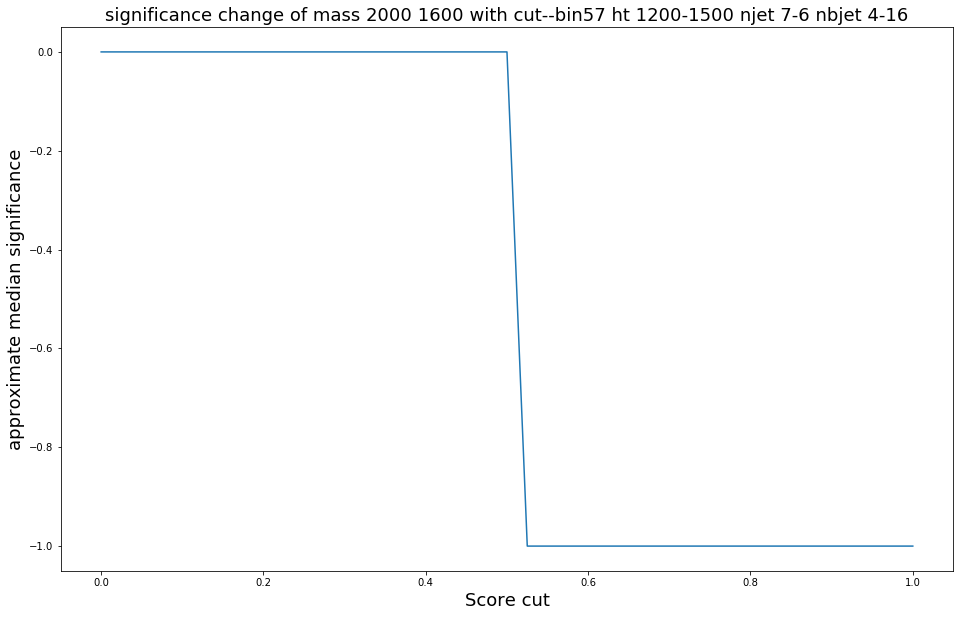

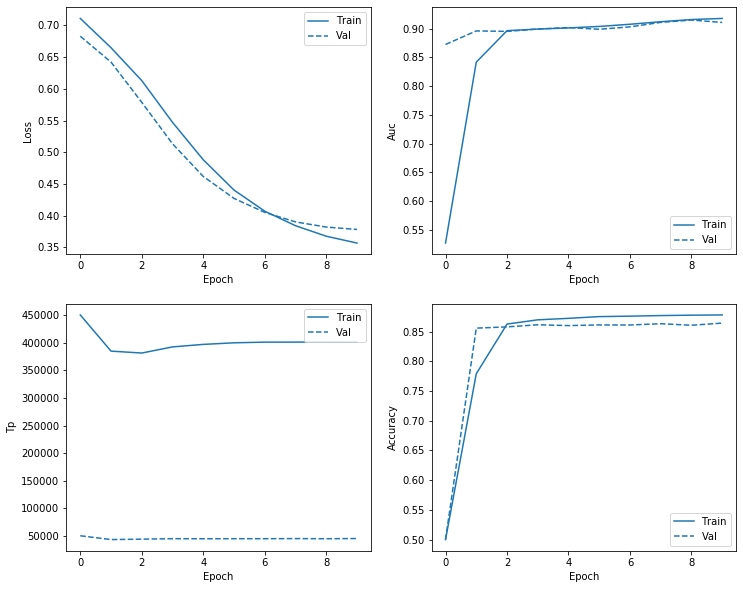

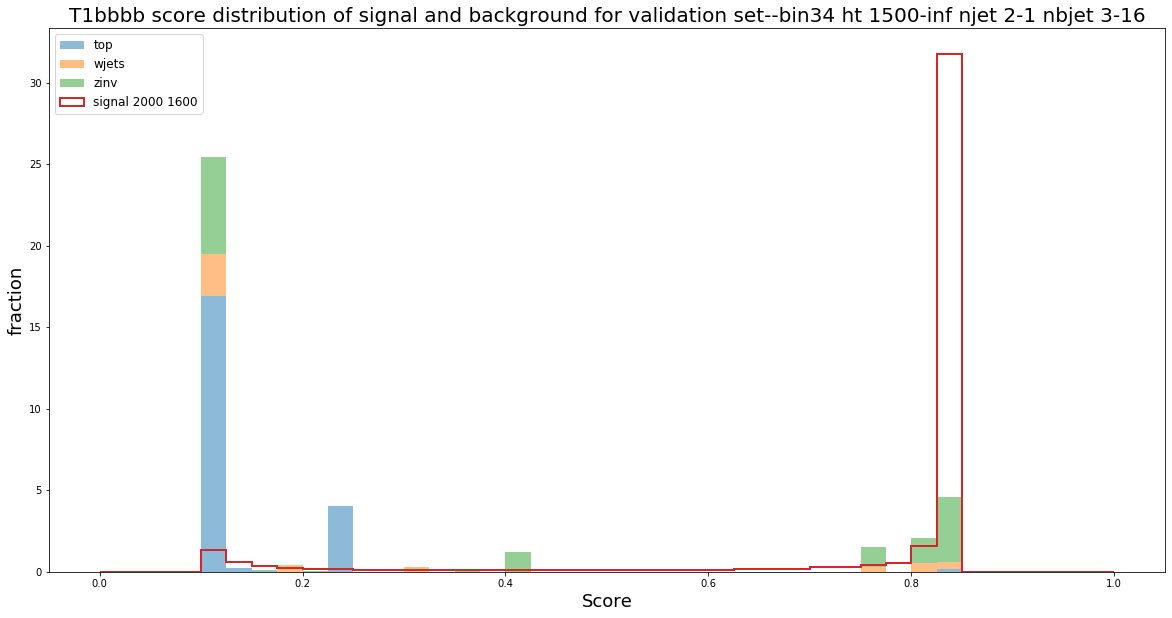

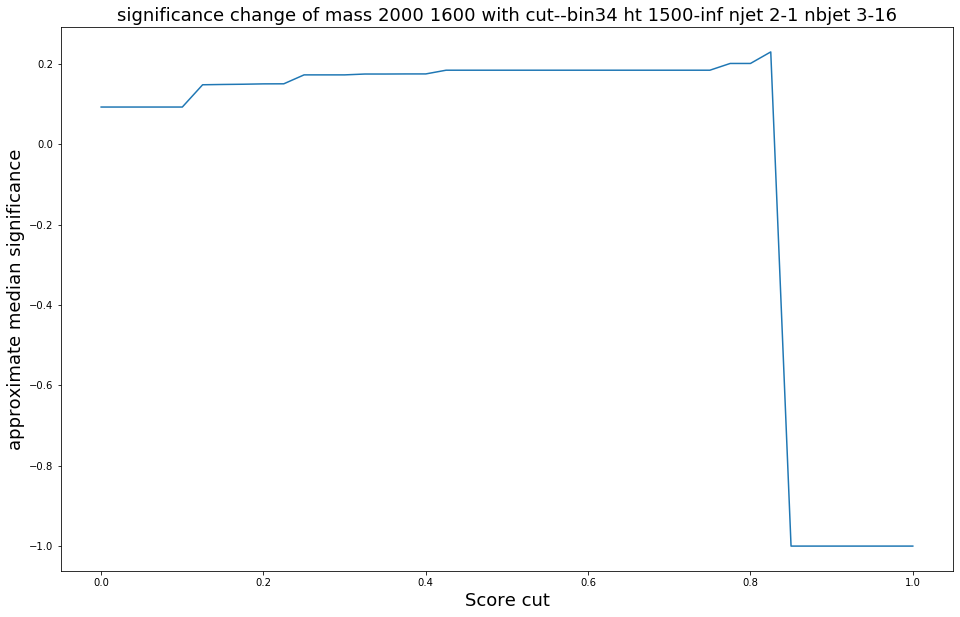

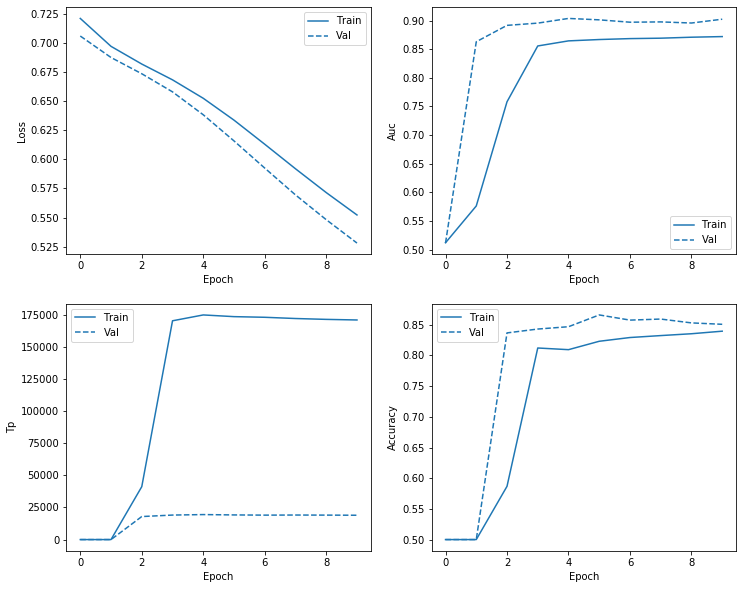

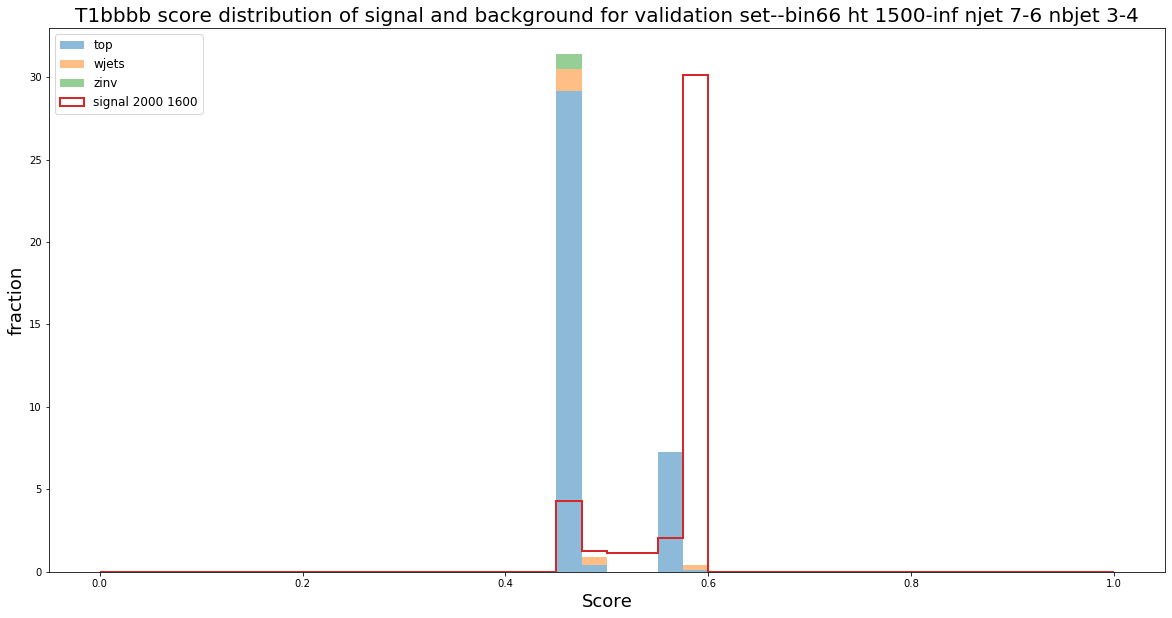

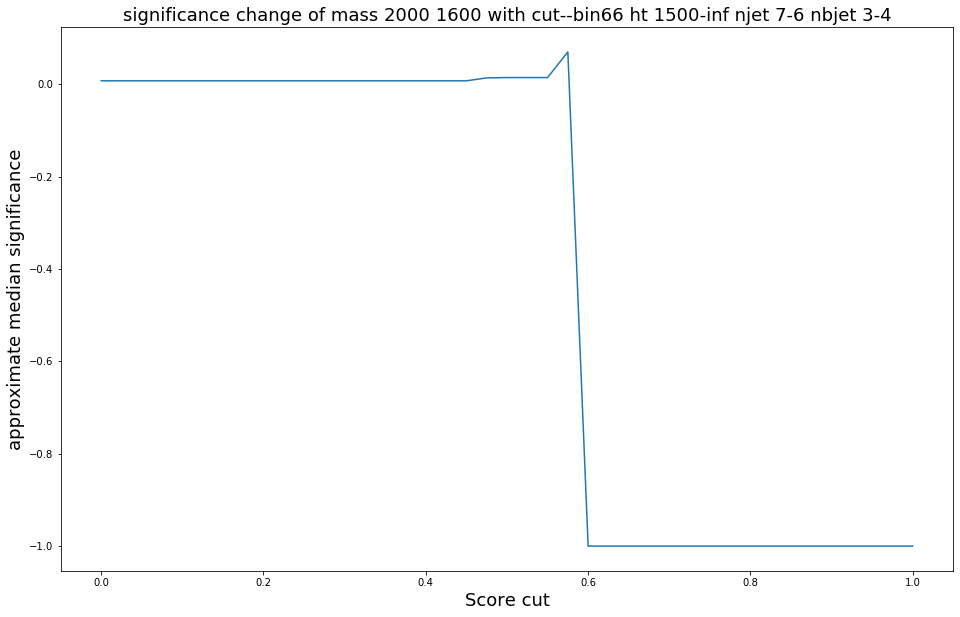

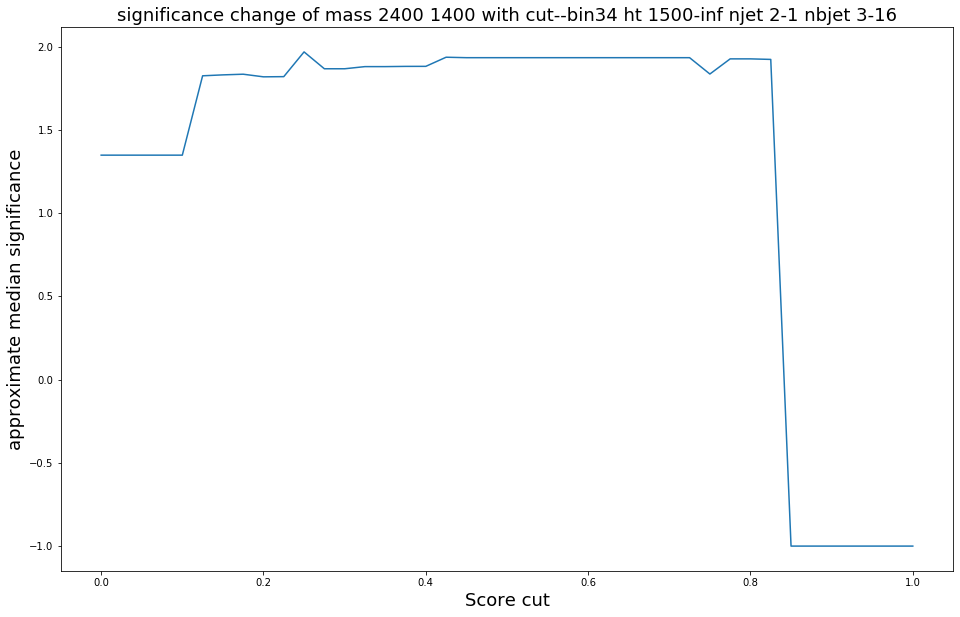

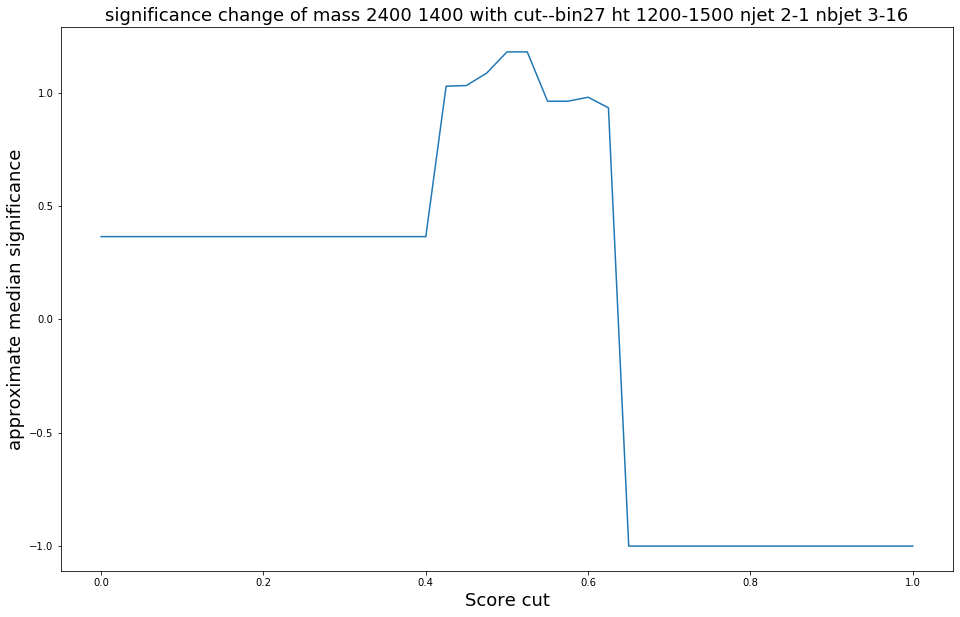

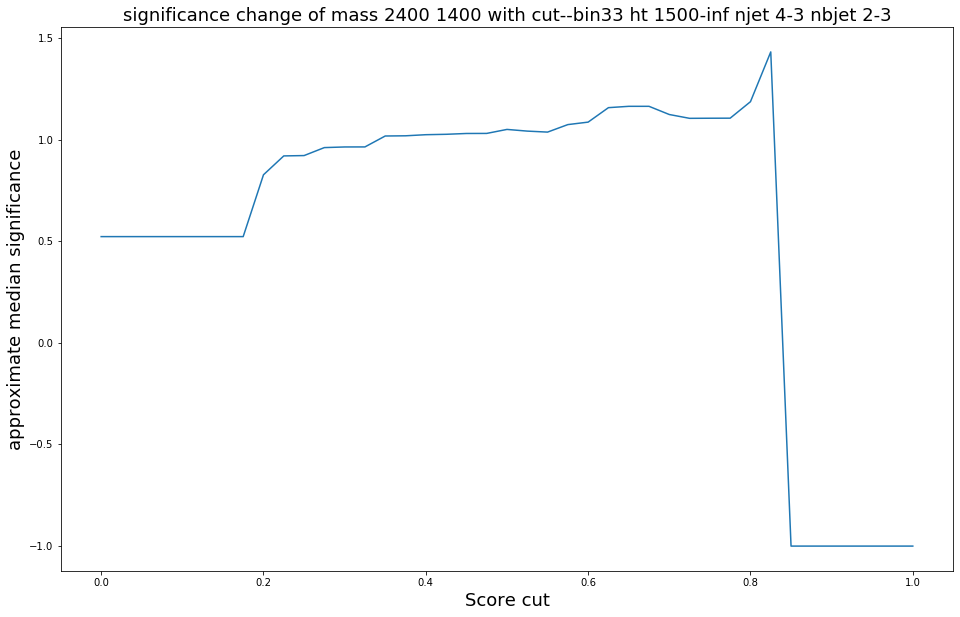

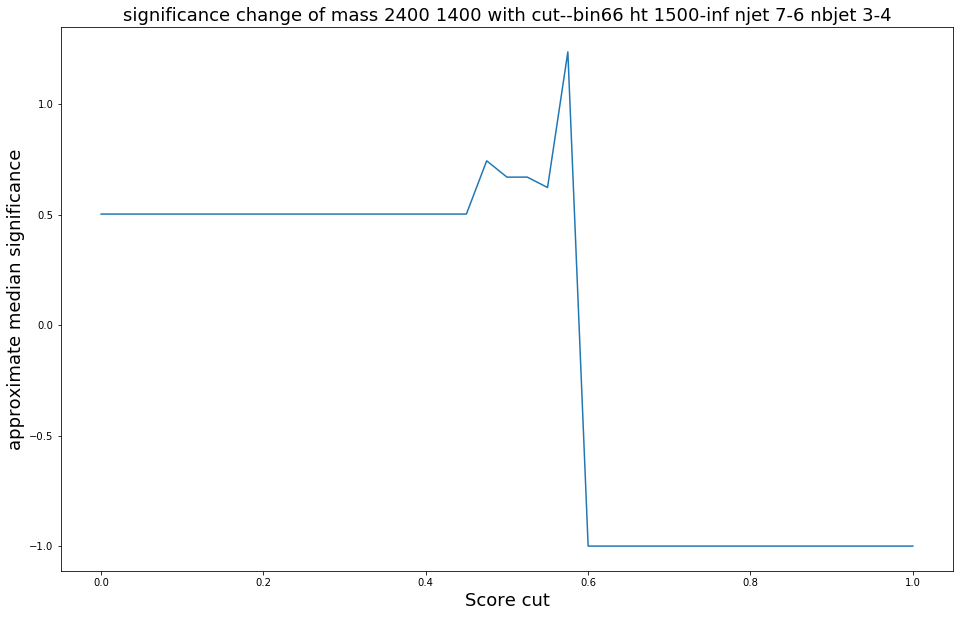

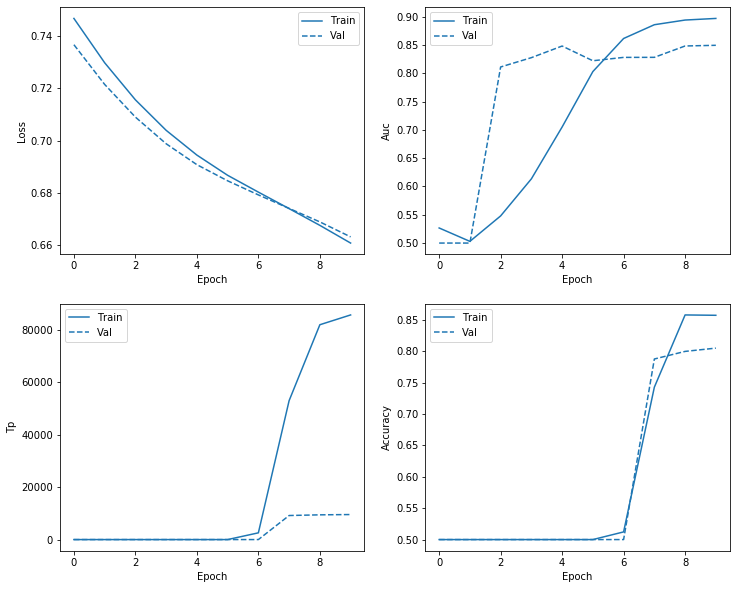

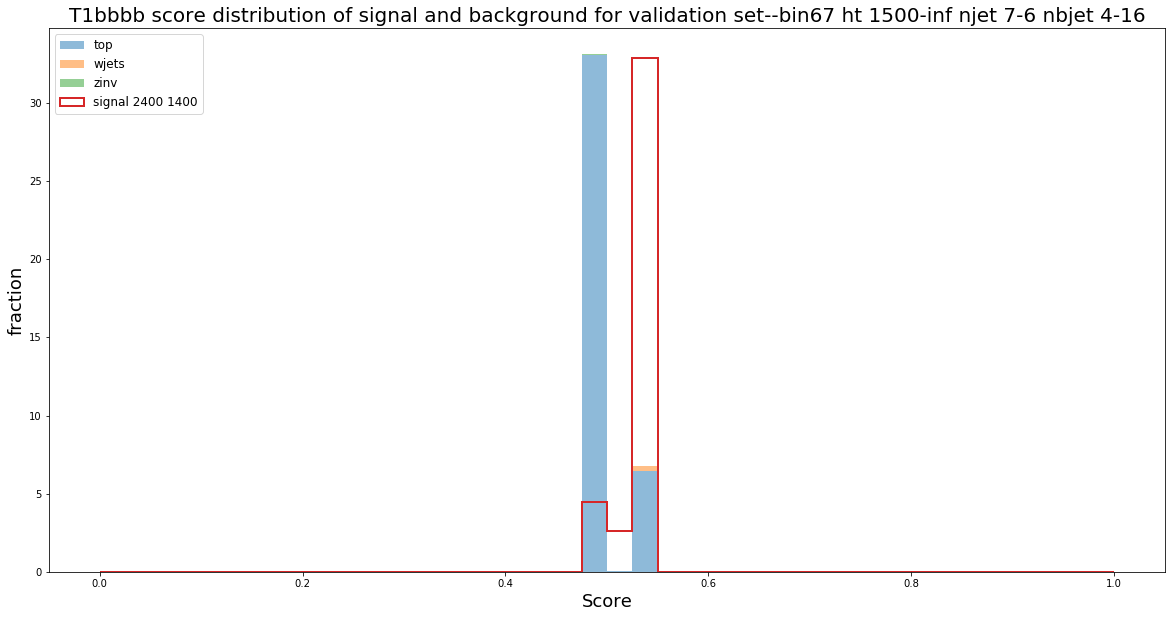

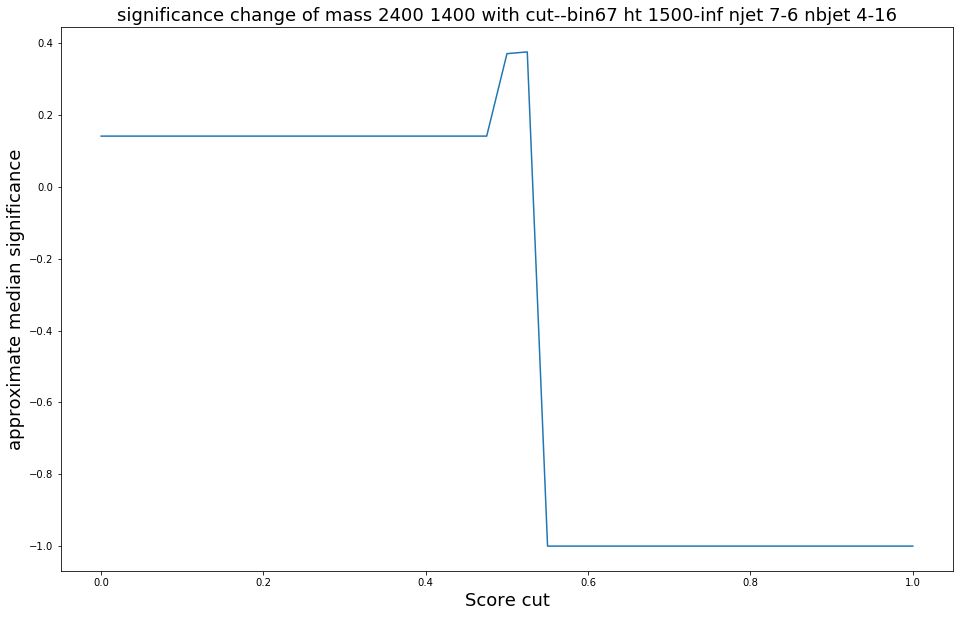

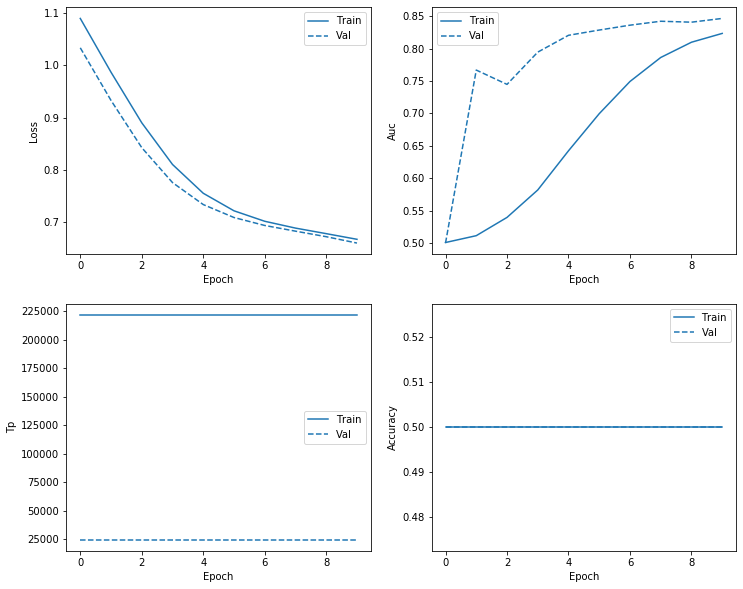

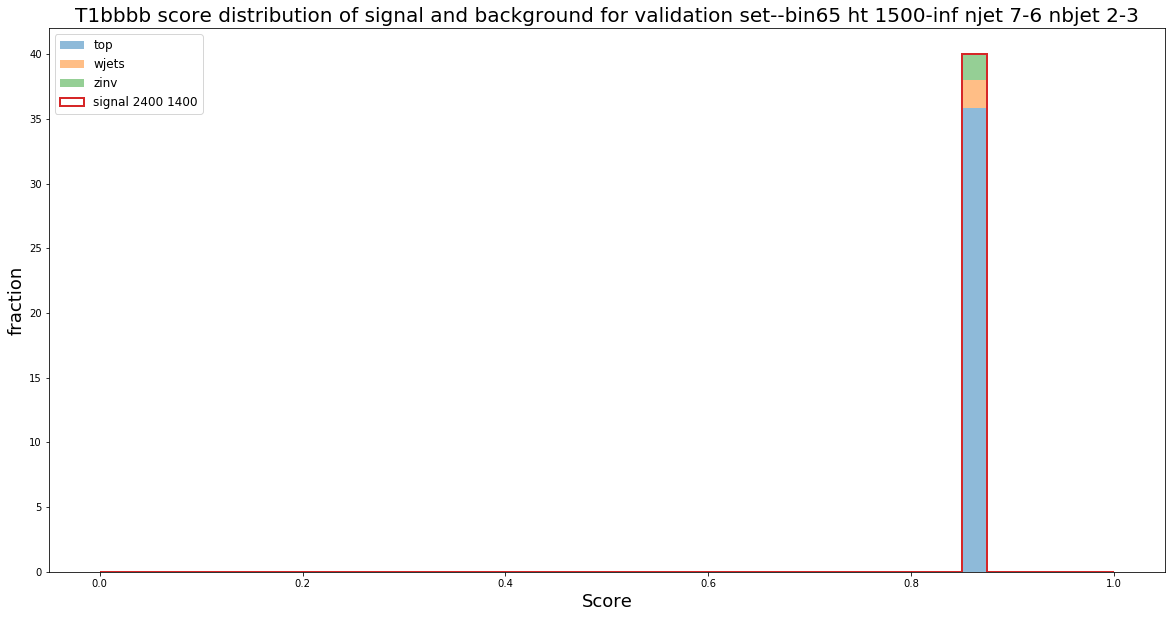

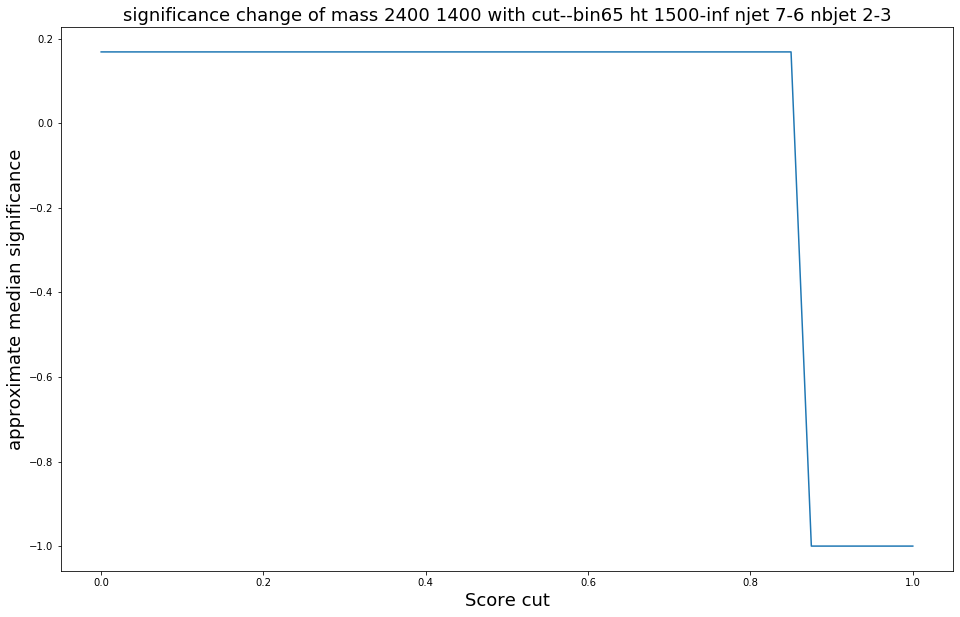

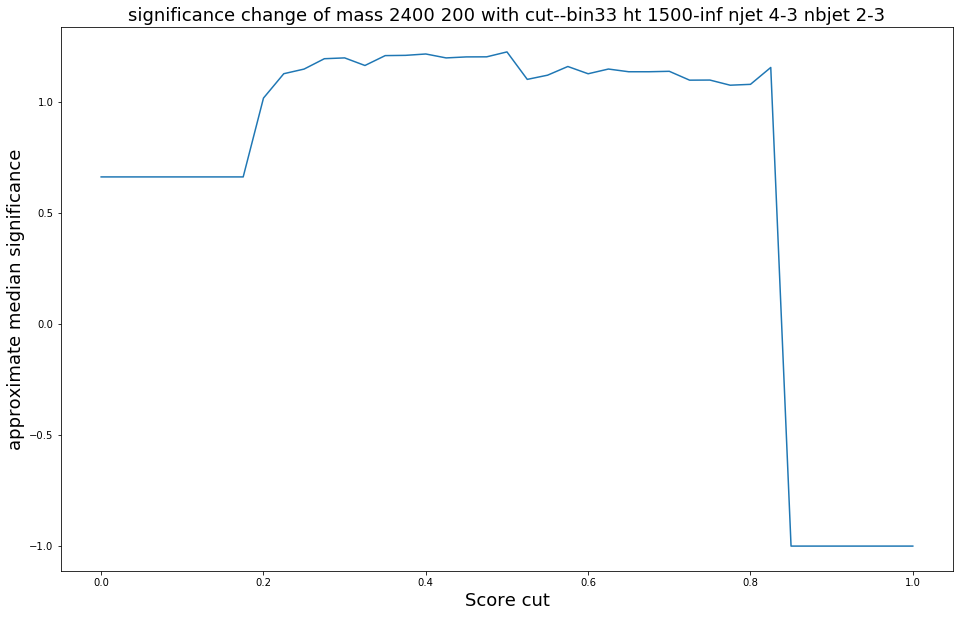

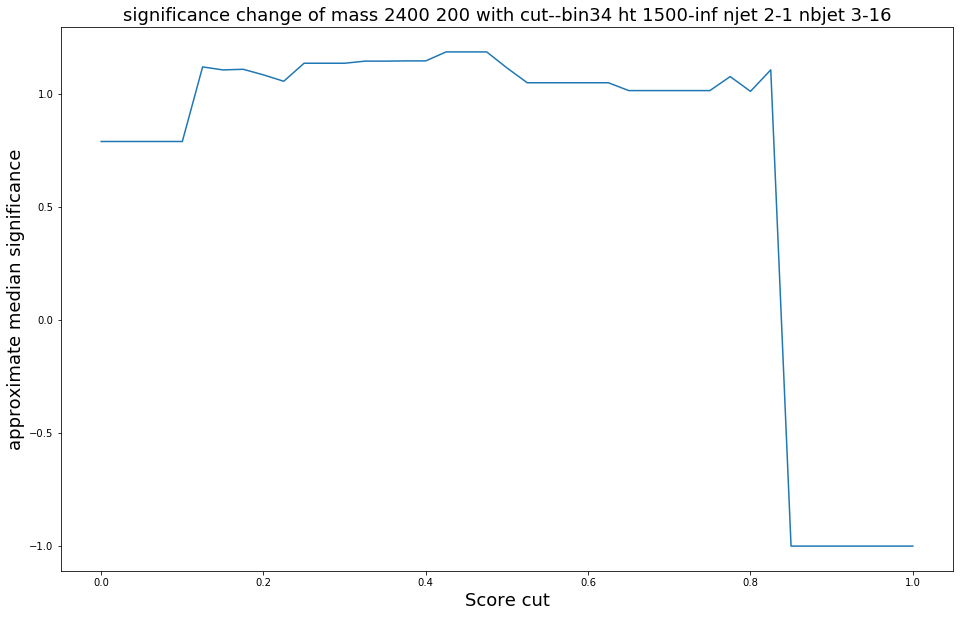

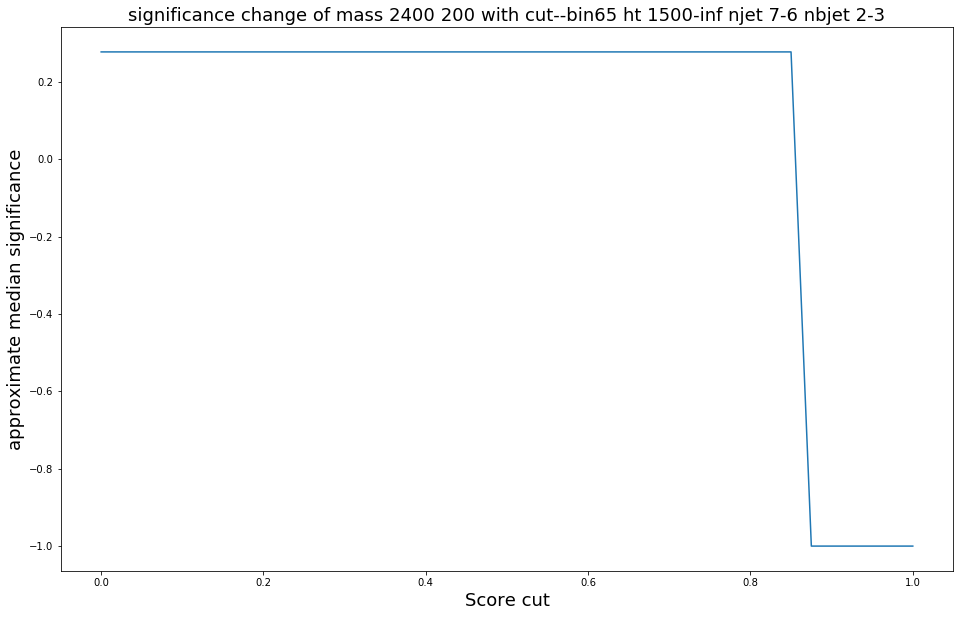

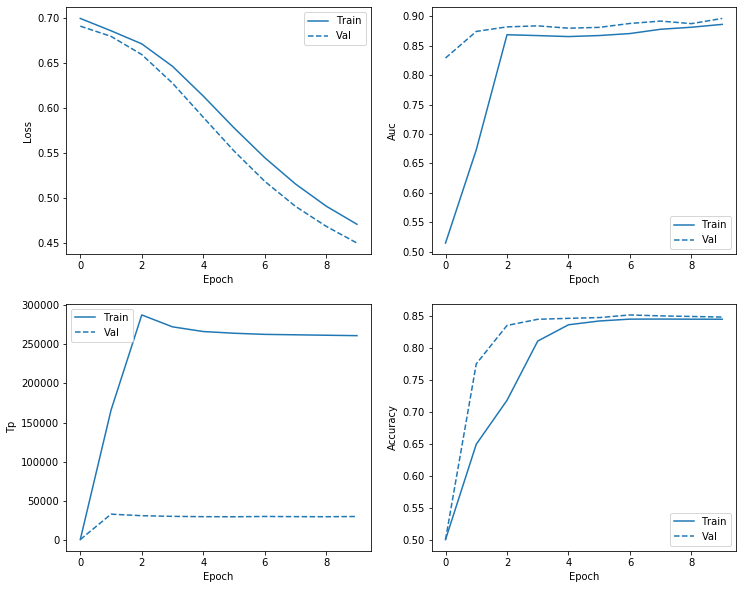

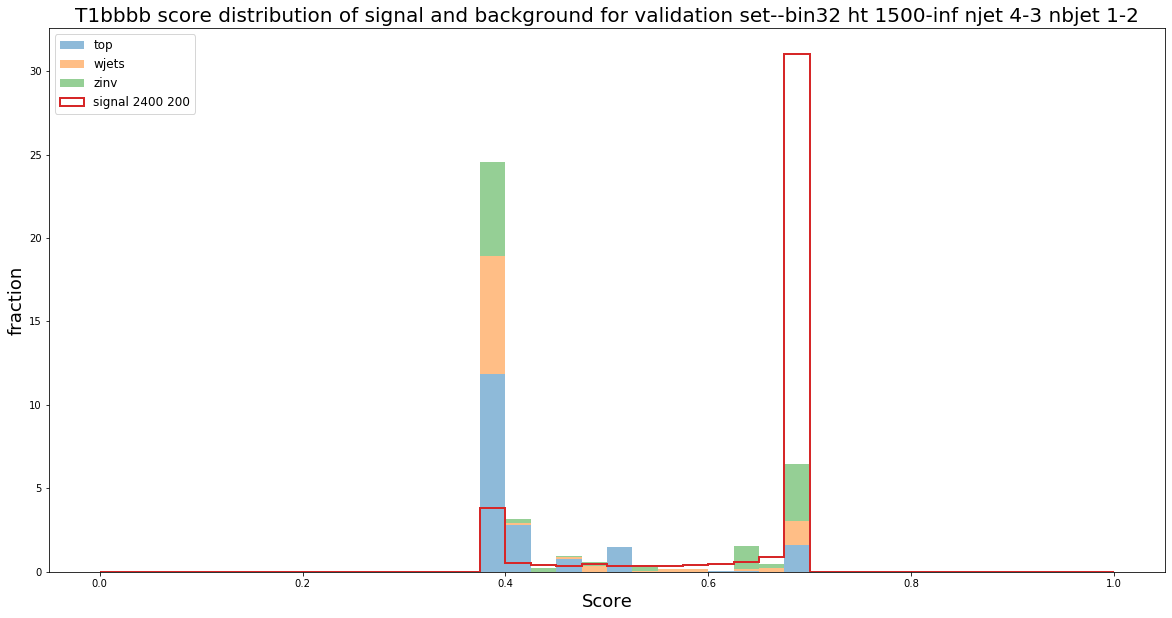

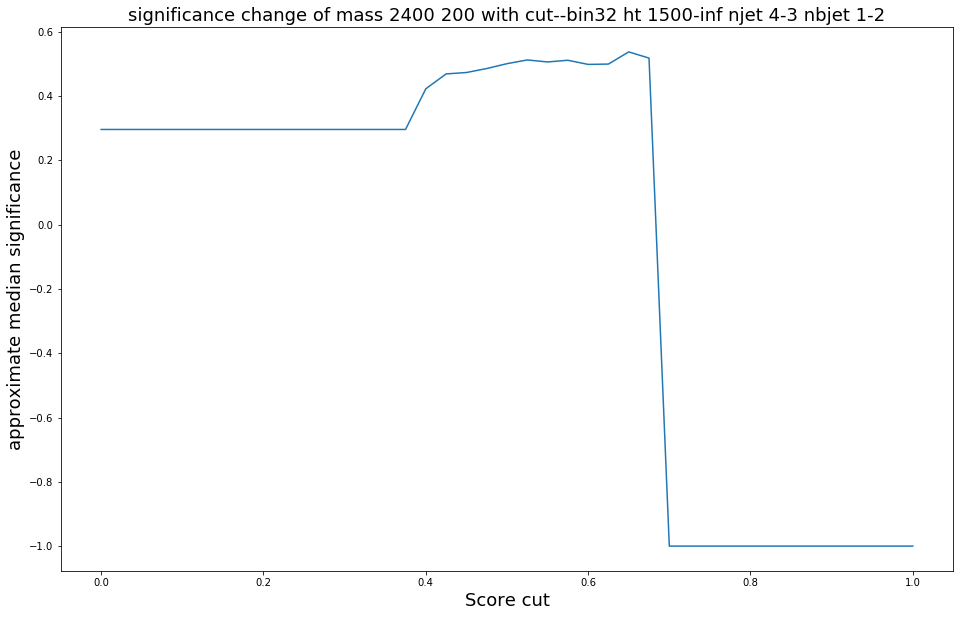

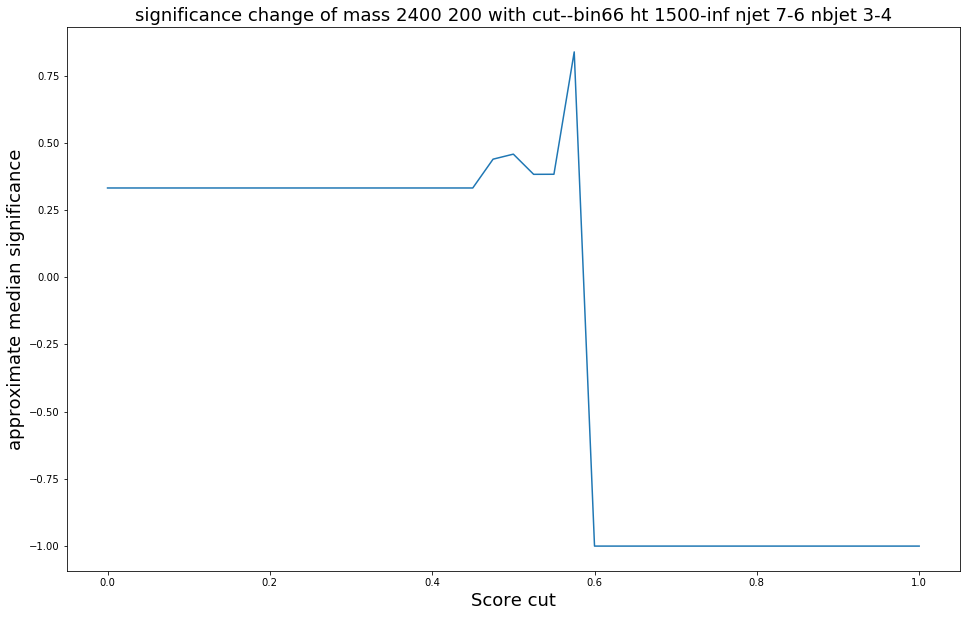

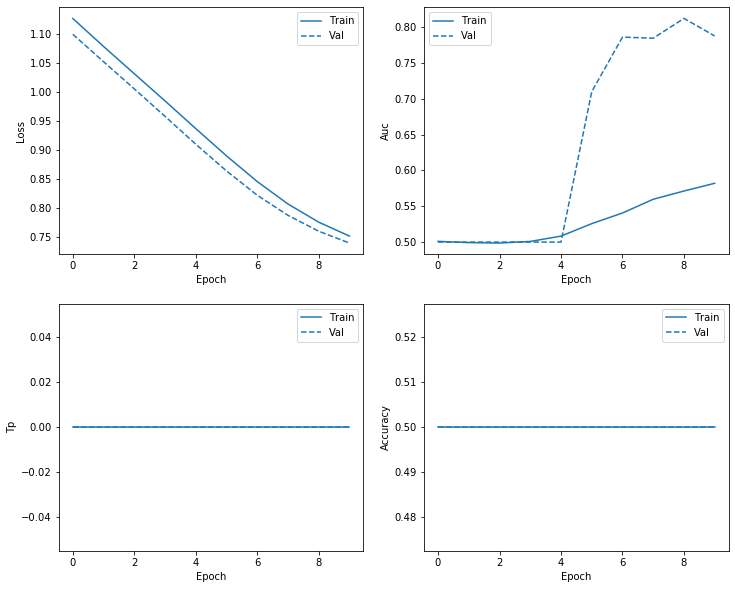

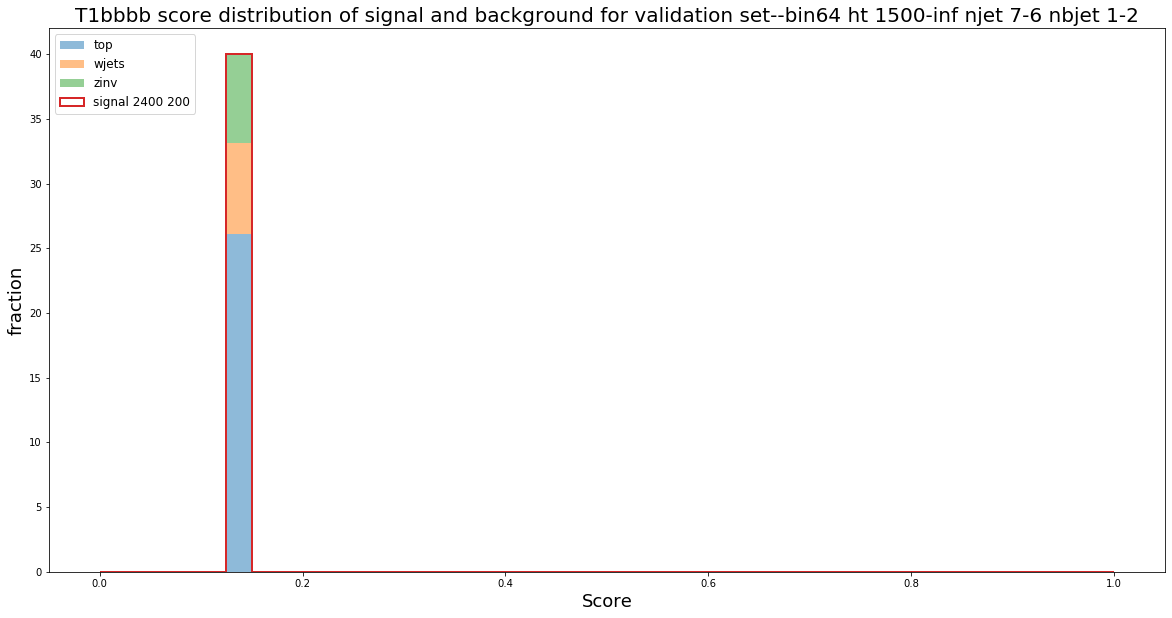

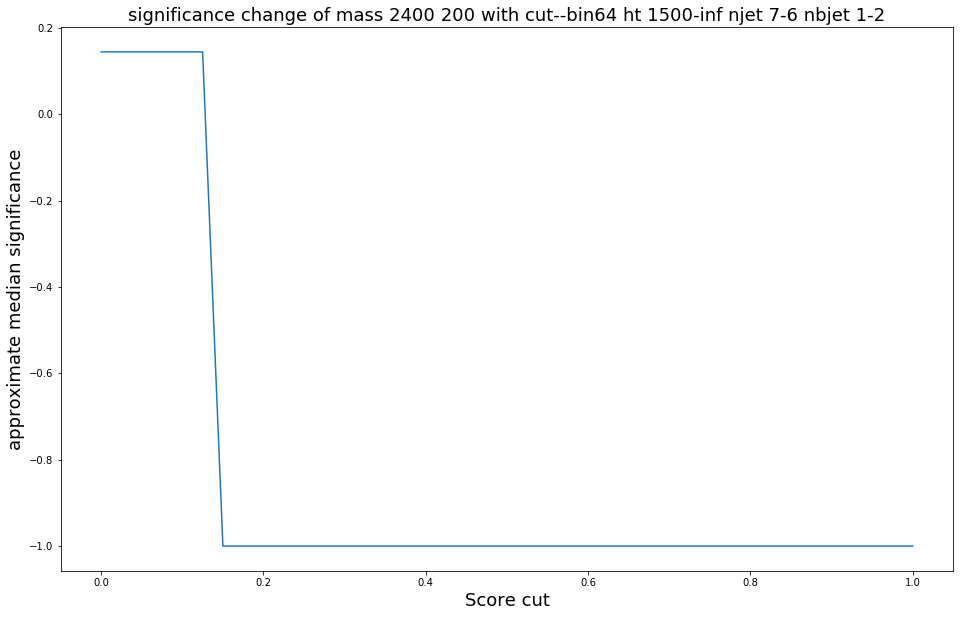

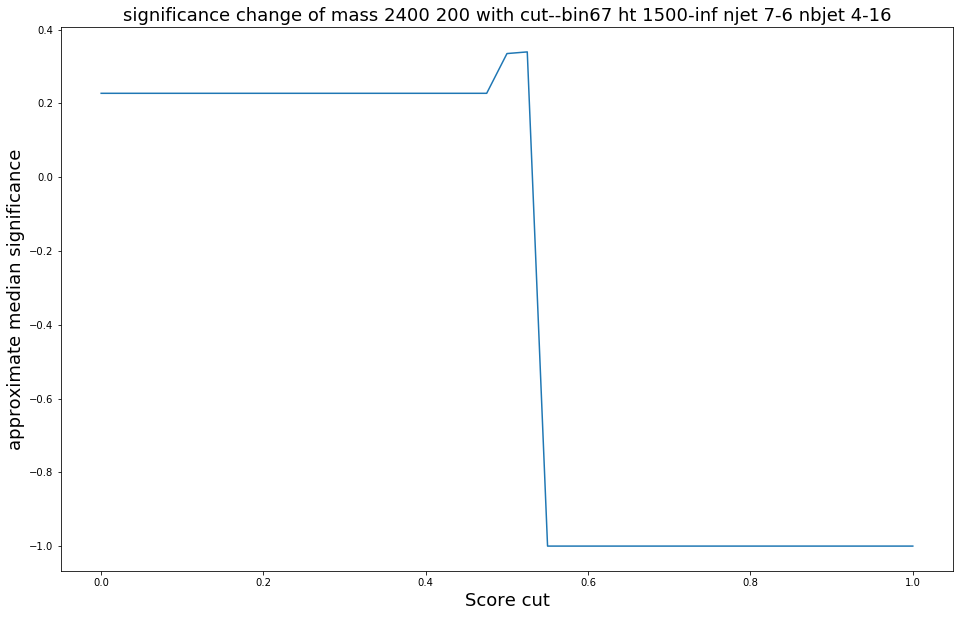

In [49]:
binsused=[]
valindex=[]
for j in range(4):
    m1=models_forbin['mass'][j][0]
    m2=models_forbin['mass'][j][1]
    models_forbin['significance'].append([])
    for i in models_forbin['binindex'][j]:
        features_train=feature_choice(selections[i][1][1]-1)
        X0=data_input[i][0][(features_train+[b'evt_scale1fb',b'GenSusyMScan1',b'GenSusyMScan2',b'absweight',b'bkgtype'])[:]]
        y0=data_input[i][0][b'sigtag']
        X1=data_input[i][1][(features_train+[b'evt_scale1fb',b'GenSusyMScan1',b'GenSusyMScan2',b'absweight',b'bkgtype'])[:]]
        y1=data_input[i][1][b'sigtag']
        if i not in binsused:
            X0_train, X0_val, y0_train, y0_val = train_test_split(X0, y0, test_size=0.1, random_state=42)
            X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.1, random_state=90)
            binsused.append(i)
            valindex.append([list(X0_val.index.values),list(X1_val.index.values)])
            X0_train=X0_train.reset_index(drop=True)
            y0_train=y0_train.reset_index(drop=True)
            X0_val=X0_val.reset_index(drop=True)
            y0_val=y0_val.reset_index(drop=True)
            X1_train=X1_train.reset_index(drop=True)
            y1_train=y1_train.reset_index(drop=True)
            X1_val=X1_val.reset_index(drop=True)
            y1_val=y1_val.reset_index(drop=True)
            X_val=pd.concat([X0_val,X1_val])
            y_val=pd.concat([y0_val,y1_val])
            val=pd.concat([X_val,y_val],axis=1)
            print("train on ",X0_train.shape[0]," background", X1_train.shape[0]," signals, validate on ",X0_val.shape[0],"background",X1_val.shape[0],"signals")
            nsample=3*np.max([X0_train.shape[0],X1_train.shape[0]])
            ids0=np.arange(X0_train.shape[0])
            ids1=np.arange(X1_train.shape[0])
    #choices = np.random.choice(ids, data_input[i][0].shape[0])
            choices0 = np.random.choice(ids0, nsample)
            choices1 = np.random.choice(ids1, nsample)
    #res_data=pd.concat([data_input[i][1].iloc[choices,:],data_input[i][0]])
            res_X_train=pd.concat([X0_train.iloc[choices0,:],X1_train.iloc[choices1,:]])
            res_y_train=pd.concat([y0_train.iloc[choices0],y1_train.iloc[choices1]])
            res_X_train=res_X_train.reset_index(drop=True)
            res_y_train=res_y_train.reset_index(drop=True)
            nsample=3*np.max([X0_val.shape[0],X1_val.shape[0]])
            ids0=np.arange(X0_val.shape[0])
            ids1=np.arange(X1_val.shape[0])
            choices0 = np.random.choice(ids0, nsample)
            choices1 = np.random.choice(ids1, nsample)
    #res_data=pd.concat([data_input[i][1].iloc[choices,:],data_input[i][0]])
            res_X_val=pd.concat([X0_val.iloc[choices0,:],X1_val.iloc[choices1,:]])
            res_y_val=pd.concat([y0_val.iloc[choices0],y1_val.iloc[choices1]])
            res_X_train=res_X_train.reset_index(drop=True)
            res_y_train=res_y_train.reset_index(drop=True)
            res_X_val=res_X_val.reset_index(drop=True)
            res_y_val=res_y_val.reset_index(drop=True)
            print (res_y_train[res_y_train==0].shape[0], res_y_train[res_y_train==1].shape[0], res_y_val[res_y_val==0].shape[0], res_y_val[res_y_val==1].shape[0])

            def make_model(metrics = METRICS, output_bias=None):
                if output_bias is not None:
                    output_bias = tf.keras.initializers.Constant(output_bias)
                model = keras.Sequential([
                    keras.layers.Dense(
                    30, kernel_initializer='normal', activation='sigmoid',
                     input_shape=(len(features_train),)),
                     keras.layers.Dropout(0.5),
                     keras.layers.Dense(
                     10, kernel_initializer='normal', activation='sigmoid'),
                     keras.layers.Dense(
                     10, kernel_initializer='normal', activation='sigmoid'),
                      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
                ])
                adam=optimizers.Adam(lr=0.001)
                model.compile(
                     optimizer='Adam',
                    loss='binary_crossentropy',
                     metrics=metrics)
                return model

            filepath="weights_T1bbbb_bin_"+str(i)+".best.hdf5"
            checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
            callbacks_list = [checkpoint]
            model = make_model()
            model_history=model.fit(x=res_X_train[features_train[:]],
            y=res_y_train,
            batch_size=20000,
            epochs=10,
            callbacks = callbacks_list,
            validation_data=(res_X_val[features_train[:]], res_y_val))
            histroyplot=plot_metrics(model_history)
            histroyplot.savefig("learning_curve_bin"+str(i)+".png")
            model.load_weights(filepath)
            figscore = plt.figure(figsize=(20,10))
            axscore = figscore.add_subplot(111)
            val[b'MLscore']=model.predict(val[features_train[:]], batch_size=20000)
            bkgscore=[val[(val[b'bkgtype']==0)|(val[b'bkgtype']==1)][b'MLscore'], \
               val[val[b'bkgtype']==2][b'MLscore'],
               val[val[b'bkgtype']==3][b'MLscore']]
            bkgweight=[val[(val[b'bkgtype']==0)|(val[b'bkgtype']==1)][b'evt_scale1fb'], \
               val[val[b'bkgtype']==2][b'evt_scale1fb'],
               val[val[b'bkgtype']==3][b'evt_scale1fb']]
            bkgname=['top','wjets','zinv']
            axscore.hist(bkgscore,bins=np.arange(0,1.025,0.025),stacked=True,alpha=0.5,label=bkgname,density=True,weights=bkgweight)
            axscore.hist(val[val[b'sigtag']==1][b'MLscore'],bins=np.arange(0,1.025,0.025),alpha=1,label='signal '+str(m1)+" "+str(m2),density=True,histtype='step',linewidth=2)
            axscore.legend(loc='upper left',prop={'size': 12})
            axscore.set_title("T1bbbb score distribution of signal and background for validation set--bin"+str(i)+" ht "+str(selections[i][0][0])
                       +"-"+str(selections[i][0][1])+" njet "+str(selections[i][1][0])+"-"+str(selections[i][1][0]-1)
                       +" nbjet "+str(selections[i][2][0])+"-"+str(selections[i][2][1]),fontsize=20)
            axscore.set_xlabel('Score',fontsize=18)
            axscore.set_ylabel('fraction',fontsize=18)
            figscore.savefig("scorecompare_bin_"+str(i)+"_mass_"+str(m1)+"_"+str(m2)+".png")
        else:
            filepath="weights_T1bbbb_bin_"+str(i)+".best.hdf5"
            model=keras.models.load_model(filepath)
            valindex_thisbin=valindex[binsused.index(i)]
            X_val=pd.concat([X0.loc[valindex_thisbin[0]],X1.loc[valindex_thisbin[1]]])
            y_val=pd.concat([y0.loc[valindex_thisbin[0]],y1.loc[valindex_thisbin[1]]])
            val=pd.concat([X_val,y_val],axis=1)
            val[b'MLscore']=model.predict(val[features_train[:]], batch_size=20000)
        midsig=[]
        for cut in np.arange(0, 1.025,0.025):
            midsig.append(significance(val,m1,m2,MLuse_sig[i]*0.1,MLuse_bkg[i]*0.1,cut,sigtag=b'sigtag',score=b'MLscore'))
        models_forbin['significance'][j].append(midsig)
        figmidsig=plt.figure(figsize=(16,10))
        axmidsig = figmidsig.add_subplot(111)
        axmidsig.plot(np.arange(0, 1.025,0.025),midsig)
        axmidsig.set_title("significance change of "+"mass "+str(m1)+" "+str(m2) +" with cut--bin"+str(i)+" ht "+str(selections[i][0][0])
                       +"-"+str(selections[i][0][1])+" njet "+str(selections[i][1][0])+"-"+str(selections[i][1][0]-1)
                       +" nbjet "+str(selections[i][2][0])+"-"+str(selections[i][2][1]),fontsize=18)
        axmidsig.set_xlabel('Score cut',fontsize=18)
        axmidsig.set_ylabel('approximate median significance',fontsize=18)
        figmidsig.savefig("significance_bin_"+str(i)+"_mass_"+str(m1)+"_"+str(m2)+".png")
    
#X=X.fillna(0,inplace=True)

In [53]:
np.save("savetry.npy",models_forbin)

In [55]:
d1=np.load("savetry.npy",allow_pickle=True)

In [63]:
d1.item()

{'mass': [[1400, 1350], [2000, 1600], [2400, 1400], [2400, 200]],
 'binindex': [[33, 19, 20],
  [20, 47, 13, 46, 27, 57, 34, 66],
  [34, 27, 33, 66, 67, 65],
  [33, 34, 65, 32, 66, 64, 67]],
 'significance': [[[0.5273685915088019,
    0.5273685915088019,
    0.5273685915088019,
    0.5273685915088019,
    0.5273685915088019,
    0.5273685915088019,
    0.5280203214078819,
    0.5391361574730219,
    0.5479863302679839,
    0.5752615748738369,
    0.5982058906859689,
    0.6397197898521669,
    0.6696998645581951,
    0.6970937745691018,
    0.747267534060687,
    0.8005097920387269,
    0.8775063760182698,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1,
    -1],
   [0.5273685915088019,
    0.5273685915088019,
    0.5273685915088019,
    0.5273685915088019,
    0.5273685915088019,
    0.5273685915088019,
    0.5273685915088019,
    0.52

In [52]:
midsig

[0.5494864680398232,
 0.5656942224493686,
 0.5677701439428144,
 0.5746267240912473,
 0.5911998040010089,
 0.5836570745132587,
 0.5884500062537673,
 0.5422679960952115,
 0.541642469052706,
 0.5686218999121962,
 0.5354248135501175,
 0.5192755955195348,
 0.5407284595150956,
 0.45408741873393005,
 0.3457085888590835,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]

In [ ]:
weight_for_1

In [ ]:

#model.fit(x=X_train[features_train[:]], y=y_train, epochs=10, batch_size=10000)

In [ ]:
model1 = Sequential()
adam=optimizers.Adam(lr=0.001)
model1.add(Dense(1024, input_shape=(X[features_train].shape[1],), kernel_initializer='normal', activation='relu'))
model1.add(Dense(500, kernel_initializer='normal', activation='sigmoid'))
model1.add(Dense(128, kernel_initializer='normal', activation='sigmoid'))
model1.add(Dense(64, kernel_initializer='normal', activation='sigmoid'))
model1.add(Dense(64, kernel_initializer='normal', activation='sigmoid'))
#model.add(Dense(10, kernel_initializer='normal', activation='sigmoid'))
model1.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model1.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
model1.load_weights("weights_T1bbbb2016_unweighted_btagDeepCSV_excluded_V02.best.hdf5")
#model1.load_weights("weights_T1bbbb2016_unweighted_V02.best.hdf5")
#model1.load_weights("weights_T1bbbb2016_unweighted.best.hdf5")
#model1.load_weights("weights_T1bbbb2016_unweighted_btagDeepCSV_excluded.best.hdf5")

In [ ]:
#model1.save("model_T1bbbb2016_unweighted_btagDeepCSV_excluded.h5")
#model1.save("model_T1bbbb2016_unweighted.h5")
#model1.save("model_T1bbbb2016_unweighted_V02.h5")
model1.save("model_T1bbbb2016_unweighted_btagDeepCSV_excluded_V02.h5")

In [ ]:
fig=plot_history([('signal - background classification',model_history)])
#fig.savefig('T1bbbb_unweighted_learningcurve_V02.pdf')
#fig.savefig('T1bbbb_unweighted_learningcurve_V02.png')
#fig.savefig('T1bbbb_unweighted_learningcurve_btagDeepCSVexcluded.pdf')
#fig.savefig('T1bbbb_unweighted_learningcurve_btagDeepCSVexcluded.png')
fig.savefig('T1bbbb_unweighted_learningcurve_btagDeepCSVexcluded_V02.pdf')
fig.savefig('T1bbbb_unweighted_learningcurve_btagDeepCSVexcluded_V02.png')

In [ ]:
results = model1.predict(X_val[features_train[:]], batch_size=10000)

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_val, results,sample_weight=X_val[b'evt_scale1fb'][:])
#auc = roc_auc_score(y_test, results)
print("area under ROC curve: ", auc)

In [ ]:
sigtest_score= model1.predict(datasig_T1bbbb_2016_test[features_train[:]], batch_size=10000)
bkgtest_score= model1.predict(databkg_2016_test[features_train[:]],batch_size=10000)

In [ ]:
databkg_2016_test[b'MLscore']=bkgtest_score
datasig_T1bbbb_2016_test[b'MLscore']=sigtest_score

In [ ]:
fig3 = plt.figure(figsize=(20,10))
ax3 = fig3.add_subplot(111)
bkgscore=[databkg_2016_test[databkg_2016_test[b'bkgtype']==0][b'MLscore'], \
          databkg_2016_test[(databkg_2016_test[b'bkgtype']==1)|(databkg_2016_test[b'bkgtype']==2)][b'MLscore'], \
         databkg_2016_test[databkg_2016_test[b'bkgtype']==3][b'MLscore'],
         databkg_2016_test[databkg_2016_test[b'bkgtype']==4][b'MLscore']]
bkgweight=[databkg_2016_test[databkg_2016_test[b'bkgtype']==0][b'evt_scale1fb'], \
          databkg_2016_test[(databkg_2016_test[b'bkgtype']==1)|(databkg_2016_test[b'bkgtype']==2)][b'evt_scale1fb'], \
         databkg_2016_test[databkg_2016_test[b'bkgtype']==3][b'evt_scale1fb'],
         databkg_2016_test[databkg_2016_test[b'bkgtype']==4][b'evt_scale1fb']]
bkgname=['qcd','top','wjets','zinv']
ax3.hist(bkgscore,bins=np.arange(0,1.025,0.025),stacked=True,alpha=0.5,label=bkgname,density=True,weights=bkgweight)
ax3.hist(datasig_T1bbbb_2016_test[b'MLscore'],bins=np.arange(0,1.025,0.025),alpha=1,label='score of test: signal',density=True,histtype='step',linewidth=2)
ax3.legend(loc='upper left',prop={'size': 12})
ax3.set_title("T1bbbb 2016 score distribution of signal and background for testing set",fontsize=20)
ax3.set_xlabel('Score',fontsize=18)
ax3.set_ylabel('fraction',fontsize=18)
#fig3.savefig('T1bbbb_2016_scoredistribution_V02.pdf')
#fig3.savefig('T1bbbb_2016_scoredistribution_V02.png')
#fig3.savefig('T1bbbb_2016_scoredistribution.pdf')
#fig3.savefig('T1bbbb_2016_scoredistribution.png')
#fig3.savefig('T1bbbb_2016_scoredistribution_btagDeepCSV_excluded.pdf')
#fig3.savefig('T1bbbb_2016_scoredistribution_btagDeepCSV_excluded.png')
fig3.savefig('T1bbbb_2016_scoredistribution_btagDeepCSV_excluded_V02.pdf')
fig3.savefig('T1bbbb_2016_scoredistribution_btagDeepCSV_excluded_V02.png')


In [ ]:
fig1 = plt.figure(figsize=(20,10))
ax0 = fig1.add_subplot(111)
bins=np.histogram(datasig_T1bbbb_2016_test[b'mt2'],bins=30)[1]
labels=['mt2 of signal T1bbbb before cut','mt2 of signal T1bbbb after cut']
ax0.hist(datasig_T1bbbb_2016_test[b'mt2'],
             bins=bins,density=True,alpha=0.5,color='orange',
             label=labels[0])
ax0.hist(datasig_T1bbbb_2016_test[datasig_T1bbbb_2016_test[b'MLscore']>0.5][b'mt2'],
             bins=bins,density=True,color='b',histtype='step',
             label=labels[1])
ax0.legend(loc='best',prop={'size': 12})
ax0.set_yscale('log')
ax0.set_xlabel('mt2',fontsize=18)
ax0.set_ylabel('fraction',fontsize=18)
ax0.set_title('comparison of T1bbbb signal before and after cut',size=20)
fig1.show()

In [ ]:
fig2 = plt.figure(figsize=(20,10))
ax2 = fig2.add_subplot(111)
bins=np.histogram(databkg_2016_test[b'mt2'],bins=30)[1]
labels=['mt2 of accumulated background before cut','mt2 of accululated background after cut']
ax2.hist(databkg_2016_test[b'mt2'],
             bins=bins,density=True,alpha=0.5,color='orange',
         weights=databkg_2016_test[b'evt_scale1fb'],
             label=labels[0])
ax2.hist(databkg_2016_test[databkg_2016_test[b'MLscore']>0.5][b'mt2'],
             bins=bins,density=True,color='b',histtype='step',
         weights=databkg_2016_test[databkg_2016_test[b'MLscore']>0.5][b'evt_scale1fb'],
             label=labels[1])
ax2.legend(loc='best',prop={'size': 12})
ax2.set_yscale('log')
ax2.set_xlabel('mt2',fontsize=18)
ax2.set_ylabel('fraction',fontsize=18)
ax2.set_title('comparison of total background before and after cut',size=20)
fig2.show()

In [ ]:
fig3 = plt.figure(figsize=(20,10))
ax3 = fig3.add_subplot(111)
bins=np.histogram(databkg_2016_test[databkg_2016_test[b'bkgtype']==4][b'mt2'],bins=30)[1]
labels=['mt2 of zinv background before cut','mt2 of zinv background after cut']
ax3.hist(databkg_2016_test[databkg_2016_test[b'bkgtype']==4][b'mt2'],
             bins=bins,density=True,alpha=0.5,color='orange',
         weights=databkg_2016_test[databkg_2016_test[b'bkgtype']==4][b'evt_scale1fb'],
             label=labels[0])
ax3.hist(databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&(databkg_2016_test[b'bkgtype']==4)][b'mt2'],
             bins=bins,density=True,color='b',histtype='step',
         weights=databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&(databkg_2016_test[b'bkgtype']==4)][b'evt_scale1fb'],
             label=labels[1])
ax3.legend(loc='best',prop={'size': 12})
ax3.set_yscale('log')
ax3.set_xlabel('mt2',fontsize=18)
ax3.set_ylabel('fraction',fontsize=18)
ax3.set_title('comparison of zinv background before and after cut',size=20)
fig3.show()

In [ ]:
fig4 = plt.figure(figsize=(20,10))
ax4 = fig4.add_subplot(111)
bins=np.histogram(databkg_2016_test[databkg_2016_test[b'bkgtype']==3][b'mt2'],bins=30)[1]
labels=['mt2 of wjets background before cut','mt2 of wjets background after cut']
ax4.hist(databkg_2016_test[databkg_2016_test[b'bkgtype']==3][b'mt2'],
             bins=bins,density=True,alpha=0.5,color='orange',
         weights=databkg_2016_test[databkg_2016_test[b'bkgtype']==3][b'evt_scale1fb'],
             label=labels[0])
ax4.hist(databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&(databkg_2016_test[b'bkgtype']==3)][b'mt2'],
             bins=bins,density=True,color='b',histtype='step',
         weights=databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&(databkg_2016_test[b'bkgtype']==3)][b'evt_scale1fb'],
             label=labels[1])
ax4.legend(loc='best',prop={'size': 12})
ax4.set_yscale('log')
ax4.set_xlabel('mt2',fontsize=18)
ax4.set_ylabel('fraction',fontsize=18)
ax4.set_title('comparison of wjets background before and after cut',size=20)
fig4.show()

In [ ]:
fig5 = plt.figure(figsize=(20,10))
ax5 = fig5.add_subplot(111)
bins=np.histogram(databkg_2016_test[databkg_2016_test[b'bkgtype']==0][b'mt2'],bins=30)[1]
labels=['mt2 of singletop background before cut','mt2 of singletop background after cut']
ax5.hist(databkg_2016_test[databkg_2016_test[b'bkgtype']==0][b'mt2'],
             bins=bins,density=True,alpha=0.5,color='orange',
         weights=databkg_2016_test[databkg_2016_test[b'bkgtype']==0][b'evt_scale1fb'],
             label=labels[0])
ax5.hist(databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&(databkg_2016_test[b'bkgtype']==0)][b'mt2'],
             bins=bins,density=True,color='b',histtype='step',
         weights=databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&(databkg_2016_test[b'bkgtype']==0)][b'evt_scale1fb'],
             label=labels[1])
ax5.legend(loc='best',prop={'size': 12})
ax5.set_yscale('log')
ax5.set_xlabel('mt2',fontsize=18)
ax5.set_ylabel('fraction',fontsize=18)
ax5.set_title('comparison of qcd background before and after cut',size=20)
fig5.show()

In [ ]:
fig7 = plt.figure(figsize=(20,10))
ax7 = fig7.add_subplot(111)
bins=np.histogram(databkg_2016_test[(databkg_2016_test[b'bkgtype']==1)|(databkg_2016_test[b'bkgtype']==2)][b'mt2'],bins=30)[1]
labels=['mt2 of top background before cut','mt2 of top background after cut']
ax7.hist(databkg_2016_test[(databkg_2016_test[b'bkgtype']==1)|(databkg_2016_test[b'bkgtype']==2)][b'mt2'],
             bins=bins,density=True,alpha=0.5,color='orange',
         weights=databkg_2016_test[(databkg_2016_test[b'bkgtype']==1)|(databkg_2016_test[b'bkgtype']==2)][b'evt_scale1fb'],
             label=labels[0])
ax7.hist(databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&((databkg_2016_test[b'bkgtype']==1)|(databkg_2016_test[b'bkgtype']==2))][b'mt2'],
             bins=bins,density=True,color='b',histtype='step',
         weights=databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&((databkg_2016_test[b'bkgtype']==1)|(databkg_2016_test[b'bkgtype']==2))][b'evt_scale1fb'],
             label=labels[1])
ax7.legend(loc='best',prop={'size': 12})
ax7.set_yscale('log')
ax7.set_xlabel('mt2',fontsize=18)
ax7.set_ylabel('fraction',fontsize=18)
ax7.set_title('comparison of top background before and after cut',size=20)
fig7.show()

In [ ]:
databkg_2016_test=databkg_2016[databkg_2016[b'MLtag']!=1]
datasig_T1bbbb_2016_test=datasig_T1bbbb_2016[datasig_T1bbbb_2016[b'MLtag']!=1]
pd.options.mode.chained_assignment = None
databkg_2016_test[b'sigtag']=0
datasig_T1bbbb_2016_test[b'sigtag']=1